# Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file 
below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
    
- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?
Business Goal:
    
You are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.


# Importing Dataset

In [5]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pylab 

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
#from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, ElasticNetCV
from sklearn.linear_model import SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
#import xgboost as xgb
#from xgboost import XGBRegressor, plot_importance
#import lightgbm as lgb
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

######################################
       Import Key Packages            
######################################


# Importing Dataset

In [6]:
train = pd.read_csv('housing_train.csv')
test = pd.read_csv('housing_test.csv')

In [7]:
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.000,8777,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.000,2280,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.000,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [8]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)


In [9]:
# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

train.rename(columns={'3SsnPorch':'TSsnPorch'}, inplace=True)
test.rename(columns={'3SsnPorch':'TSsnPorch'}, inplace=True)

test['SalePrice'] = 0

# Exploratory Data Analysis (EDA)

In [10]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,TSsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000,954.000,1168.000,1168.000,1168.000,1168.000,1168.000,1161.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1104.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000,1168.000
mean,56.768,70.988,10484.749,6.104,5.596,1970.931,1984.759,102.310,444.726,46.647,569.722,1061.095,1169.860,348.826,6.380,1525.067,0.426,0.056,1.562,0.389,2.884,1.045,6.543,0.617,1978.194,1.777,476.860,96.206,46.560,23.015,3.640,15.051,3.449,47.315,6.344,2007.805,181477.006
std,41.941,24.829,8957.442,1.390,1.124,30.145,20.785,182.596,462.665,163.520,449.376,442.272,391.162,439.696,50.893,528.043,0.522,0.237,0.552,0.505,0.817,0.216,1.598,0.651,24.891,0.746,214.467,126.159,66.381,63.191,29.089,55.081,44.897,543.264,2.686,1.330,79105.587
min,20.000,21.000,1300.000,1.000,1.000,1875.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1900.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,34900.000
25%,20.000,60.000,7621.500,5.000,5.000,1954.000,1966.000,0.000,0.000,0.000,216.000,799.000,892.000,0.000,0.000,1143.250,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1961.000,1.000,338.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,2007.000,130375.000
50%,50.000,70.000,9522.500,6.000,5.000,1972.000,1993.000,0.000,385.500,0.000,474.000,1005.500,1096.500,0.000,0.000,1468.500,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1980.000,2.000,480.000,0.000,24.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,163995.000
75%,70.000,80.000,11515.500,7.000,6.000,2000.000,2004.000,160.000,714.500,0.000,816.000,1291.500,1392.000,729.000,0.000,1795.000,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,171.000,70.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,215000.000
max,190.000,313.000,164660.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1474.000,2336.000,6110.000,4692.000,2065.000,572.000,5642.000,3.000,2.000,3.000,2.000,8.000,3.000,14.000,3.000,2010.000,4.000,1418.000,857.000,547.000,552.000,508.000,480.000,738.000,15500.000,12.000,2010.000,755000.000


# Checking Null values

In [11]:
train.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

# Checking Datatypes

In [12]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


# Checking Missing ration

In [14]:
obs = train.shape[0]
missing_ration = (train.isnull().sum()/ obs) * 100
missing_ration

MSSubClass       0.000
MSZoning         0.000
LotFrontage     18.322
LotArea          0.000
Street           0.000
Alley           93.408
LotShape         0.000
LandContour      0.000
Utilities        0.000
LotConfig        0.000
LandSlope        0.000
Neighborhood     0.000
Condition1       0.000
Condition2       0.000
BldgType         0.000
HouseStyle       0.000
OverallQual      0.000
OverallCond      0.000
YearBuilt        0.000
YearRemodAdd     0.000
RoofStyle        0.000
RoofMatl         0.000
Exterior1st      0.000
Exterior2nd      0.000
MasVnrType       0.599
MasVnrArea       0.599
ExterQual        0.000
ExterCond        0.000
Foundation       0.000
BsmtQual         2.568
BsmtCond         2.568
BsmtExposure     2.654
BsmtFinType1     2.568
BsmtFinSF1       0.000
BsmtFinType2     2.654
BsmtFinSF2       0.000
BsmtUnfSF        0.000
TotalBsmtSF      0.000
Heating          0.000
HeatingQC        0.000
CentralAir       0.000
Electrical       0.000
1stFlrSF         0.000
2ndFlrSF   

# Checking Skewness

In [15]:
train.skew()

MSSubClass       1.422
LotFrontage      2.450
LotArea         10.659
OverallQual      0.175
OverallCond      0.581
YearBuilt       -0.579
YearRemodAdd    -0.496
MasVnrArea       2.826
BsmtFinSF1       1.872
BsmtFinSF2       4.366
BsmtUnfSF        0.909
TotalBsmtSF      1.745
1stFlrSF         1.514
2ndFlrSF         0.823
LowQualFinSF     8.666
GrLivArea        1.450
BsmtFullBath     0.627
BsmtHalfBath     4.264
FullBath         0.058
HalfBath         0.656
BedroomAbvGr     0.244
KitchenAbvGr     4.365
TotRmsAbvGrd     0.645
Fireplaces       0.672
GarageYrBlt     -0.645
GarageCars      -0.359
GarageArea       0.190
WoodDeckSF       1.505
OpenPorchSF      2.411
EnclosedPorch    3.044
TSsnPorch        9.771
ScreenPorch      4.106
PoolArea        13.244
MiscVal         23.066
MoSold           0.221
YrSold           0.116
SalePrice        1.954
dtype: float64

In [16]:
train.kurt()

MSSubClass        1.698
LotFrontage      19.614
LotArea         159.000
OverallQual       0.138
OverallCond       1.011
YearBuilt        -0.504
YearRemodAdd     -1.292
MasVnrArea       11.313
BsmtFinSF1       13.180
BsmtFinSF2       21.149
BsmtUnfSF         0.420
TotalBsmtSF      15.697
1stFlrSF          6.801
2ndFlrSF         -0.520
LowQualFinSF     76.909
GrLivArea         5.633
BsmtFullBath     -0.712
BsmtHalfBath     18.150
FullBath         -0.855
HalfBath         -1.092
BedroomAbvGr      2.276
KitchenAbvGr     20.204
TotRmsAbvGrd      0.802
Fireplaces       -0.143
GarageYrBlt      -0.422
GarageCars        0.257
GarageArea        1.049
WoodDeckSF        2.891
OpenPorchSF       9.171
EnclosedPorch    10.153
TSsnPorch       116.245
ScreenPorch      18.636
PoolArea        177.777
MiscVal         607.727
MoSold           -0.397
YrSold           -1.180
SalePrice         7.391
dtype: float64

### Observation- 

Nulls: The data have 19 features with nulls, five of then area categorical and with more then 47% of missing ration. They are candidates to drop or use them to create another more interesting feature:

- PoolQC
- MiscFeature
- Alley
- Fence
- FireplaceQu

Features high skewed right, heavy-tailed distribution, and with high correlation to Sales Price. It is important to treat them (boxcox 1p transformation, Robustscaler, and drop some outliers):
- TotalBsmtSF
- 1stFlrSF
- GrLivArea

Features skewed, heavy-tailed distribution, and with good correlation to Sales Price. It is important to treat them (boxcox 1p transformation, Robustscaler, and drop some outliers):
- LotArea
- KitchenAbvGr
- ScreenPorch
- EnclosedPorch
- MasVnrArea
- OpenPorchSF
- LotFrontage
- BsmtFinSF1
- WoodDeckSF
- MSSubClass

Features high skewed, heavy-tailed distribution, and with low correlation to Sales Price. Maybe we can drop these features, or just use they with other to create a new more importants feature:
- MiscVal
- TSsnPorch
- LowQualFinSF
- BsmtFinSF2
- BsmtHalfBa

Transforme from Yaer Feature to Age, 2011 - Year feature, or YEAR(TODAY()) - Year Feature
- YearRemodAdd:
- YearBuilt
- GarageYrBlt
- YrSold



In [17]:
display(train.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1168.000,56.768,41.941,20.000,20.000,50.000,70.000,190.000
LotFrontage,954.000,70.988,24.829,21.000,60.000,70.000,80.000,313.000
LotArea,1168.000,10484.749,8957.442,1300.000,7621.500,9522.500,11515.500,164660.000
OverallQual,1168.000,6.104,1.390,1.000,5.000,6.000,7.000,10.000
OverallCond,1168.000,5.596,1.124,1.000,5.000,5.000,6.000,9.000
YearBuilt,1168.000,1970.931,30.145,1875.000,1954.000,1972.000,2000.000,2010.000
YearRemodAdd,1168.000,1984.759,20.785,1950.000,1966.000,1993.000,2004.000,2010.000
MasVnrArea,1161.000,102.310,182.596,0.000,0.000,0.000,160.000,1600.000
BsmtFinSF1,1168.000,444.726,462.665,0.000,0.000,385.500,714.500,5644.000
BsmtFinSF2,1168.000,46.647,163.520,0.000,0.000,0.000,0.000,1474.000


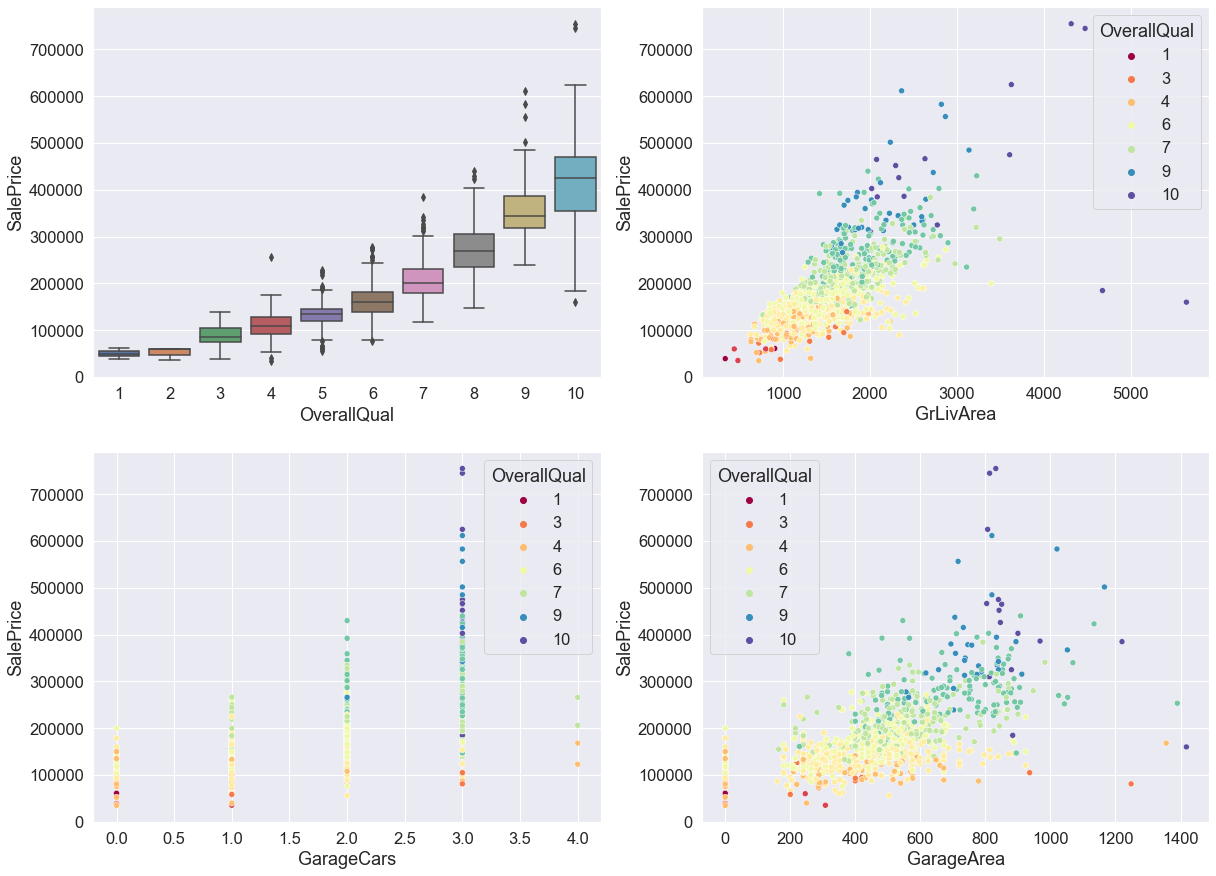

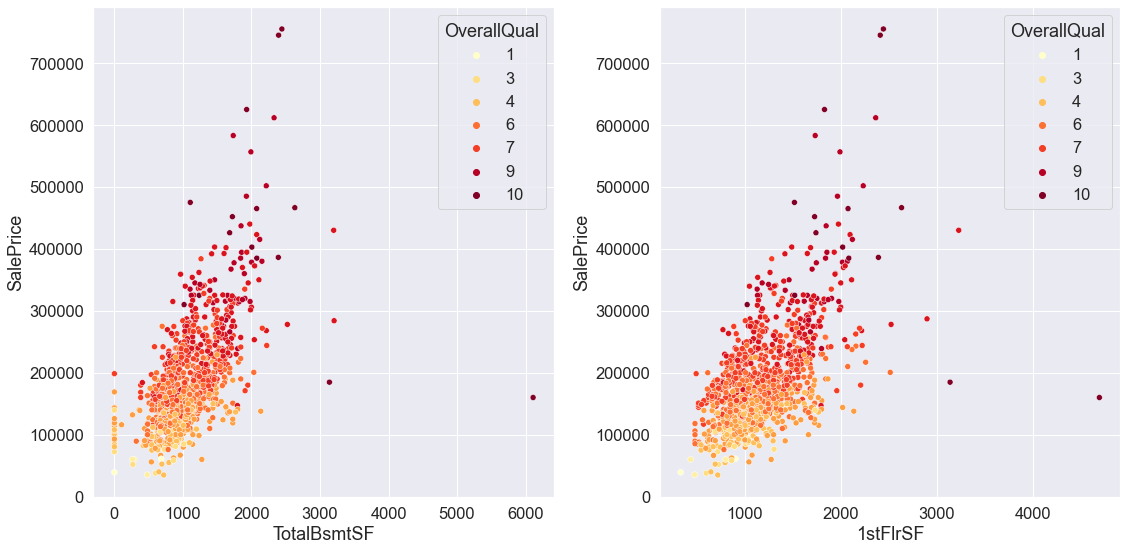

In [18]:
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)

# (Corr= 0.817185) Box plot overallqual/salePrice
fig1 = fig.add_subplot(221); sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

# (Corr= 0.700927) GrLivArea vs SalePrice plot
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.680625) GarageCars vs SalePrice plot
fig3 = fig.add_subplot(223); 
sns.scatterplot(x = train.GarageCars, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

# (Corr= 0.650888) GarageArea vs SalePrice plot
fig4 = fig.add_subplot(224); 
sns.scatterplot(x = train.GarageArea, y = train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

fig5 = plt.figure(figsize=(16, 8))
fig6 = fig5.add_subplot(121); 
sns.scatterplot(y = train.SalePrice , x = train.TotalBsmtSF, hue=train.OverallQual, palette= 'YlOrRd')

fig7 = fig5.add_subplot(122); 
sns.scatterplot(y = train.SalePrice, x = train['1stFlrSF'], hue=train.OverallQual, palette= 'YlOrRd')

plt.tight_layout(); plt.show()


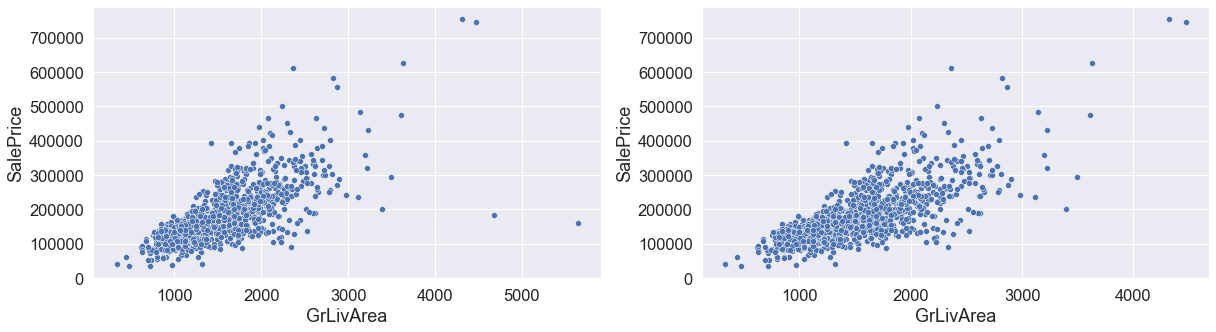

In [19]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, ax = ax)

#Deleting outliers
train = train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)

#Check the graphic again
ax = fig.add_subplot(122)
sns.scatterplot(x =train.GrLivArea, y = train.SalePrice, ax = ax)
plt.show()

### Total Rooms above Ground and Living Area

                                                                  Outliers: 1


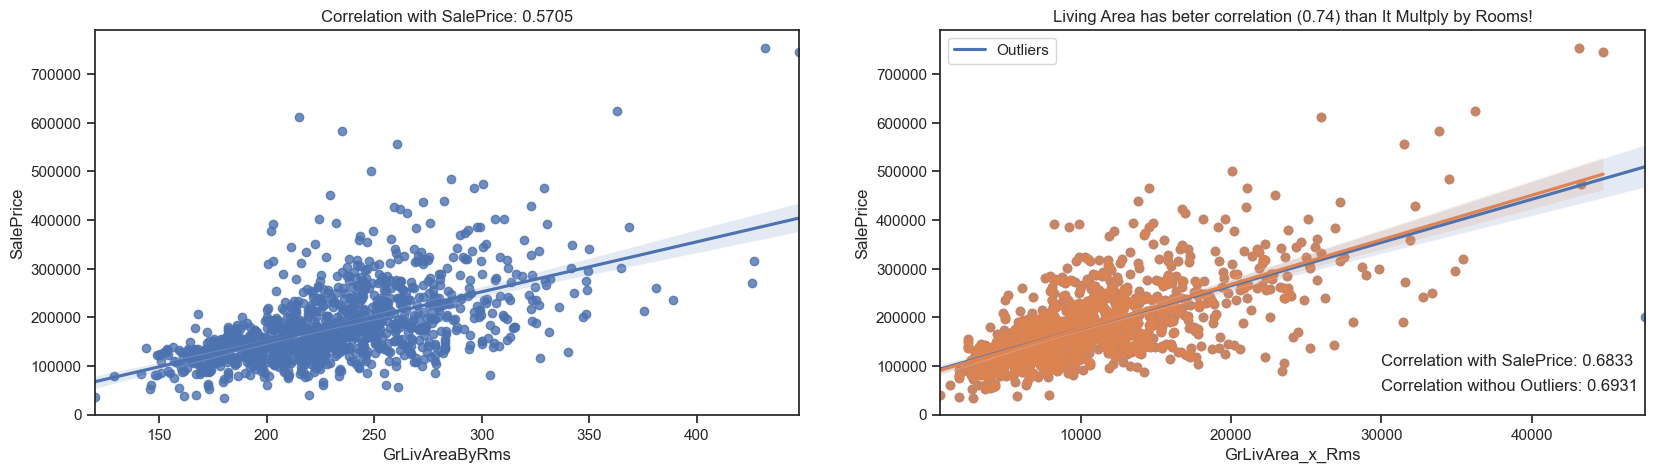

In [20]:
sns.reset_defaults()
sns.set(style="ticks", color_codes=True)

df = train[['SalePrice', 'GrLivArea', 'TotRmsAbvGrd']]
df['GrLivAreaByRms'] = train.GrLivArea/train.TotRmsAbvGrd
df['GrLivArea_x_Rms'] = train.GrLivArea*train.TotRmsAbvGrd
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='GrLivAreaByRms', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.GrLivAreaByRms.corr(df['SalePrice'])))
fig2 = fig.add_subplot(122); sns.regplot(x='GrLivArea_x_Rms', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=30000, y=100000, s='Correlation with SalePrice: {:1.4f}'.format(df.GrLivArea_x_Rms.corr(df['SalePrice'])))

print('                                                                  Outliers:',(df.GrLivArea_x_Rms>=45000).sum())
df = df.loc[df.GrLivArea_x_Rms<45000]
sns.regplot(x='GrLivArea_x_Rms', y='SalePrice', data=df); 
plt.title('Living Area has beter correlation ({:1.2f}) than It Multply by Rooms!'.format(df.GrLivArea.corr(df.SalePrice)))
plt.text(x=30000, y=50000, s='Correlation withou Outliers: {:1.4f}'.format(df.GrLivArea_x_Rms.corr(df['SalePrice'])))
plt.show()
del df

As we can see, the interaction between the two features did not present a better correlation than that already seen in the living area, include it improves to 0.74 with the cut of the outliers.

On the other hand, the multiplication not only demonstrated the living area outliers already identified, but it still emphasized another. If the strategy is to drop the TotRmsAbvGrd, we should also exclude this additional outlier.

In [21]:
train = train[train.GrLivArea * train.TotRmsAbvGrd < 45000]
print('Train observations after remove outliers:',train.shape[0])

Train observations after remove outliers: 1165


### Garage areas and parking

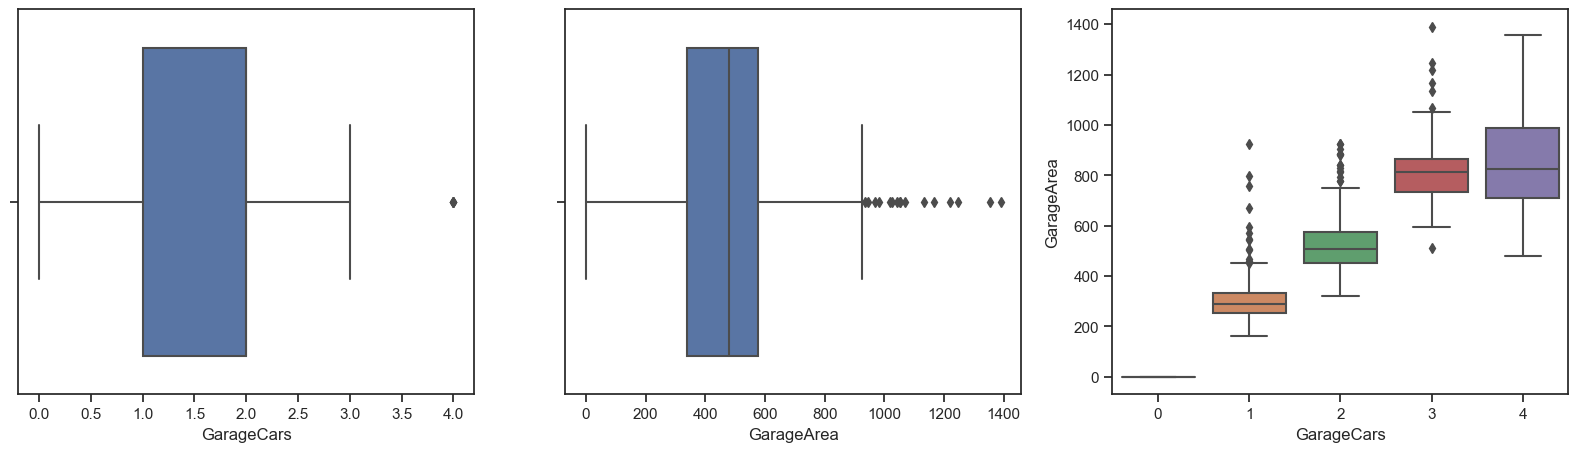

In [22]:
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(131); sns.boxplot(train.GarageCars)
fig2 = fig.add_subplot(132); sns.boxplot(train.GarageArea)
fig3 = fig.add_subplot(133); sns.boxplot(train.GarageCars, train.GarageArea)
plt.show()

Observation- From the boxplot above, we can note that more than 3 parking cars and more than 900 of area are outliers, since a few number of their observations. Although there is a relationship between them, most likely with a smaller number of parking spaces, there may be more garage area for other purposes, reason why the correlation between them is 0.88 and not 1.

                                                                 Outliers: 3


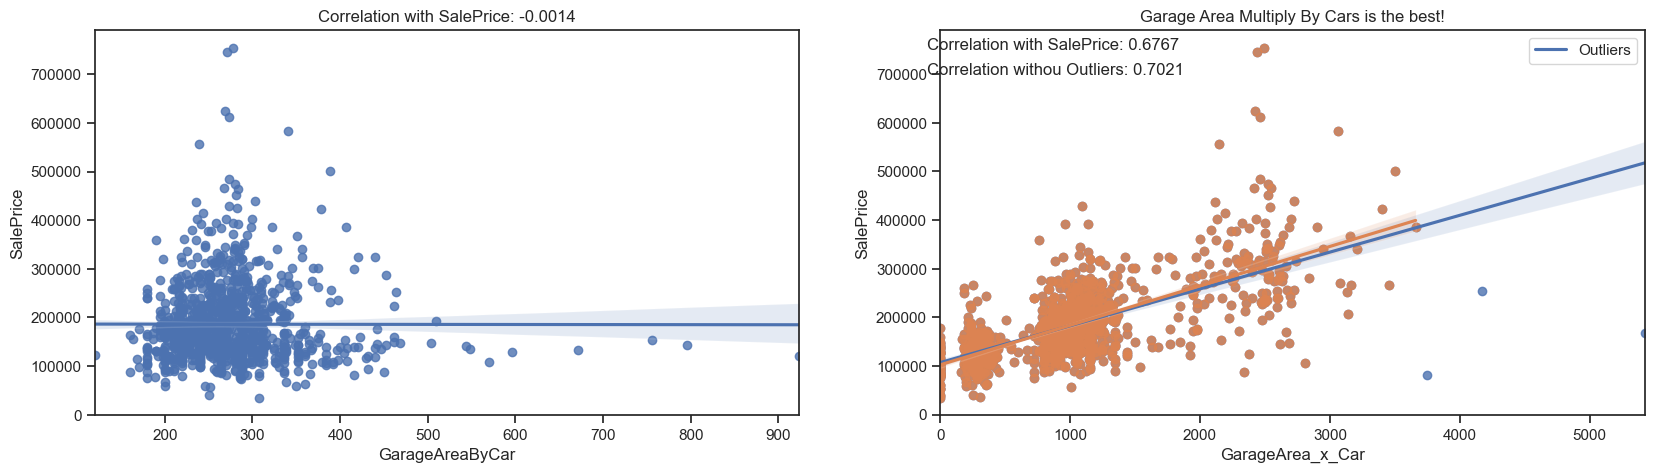

In [23]:
df = train[['SalePrice', 'GarageArea', 'GarageCars']]
df['GarageAreaByCar'] = train.GarageArea/train.GarageCars
df['GarageArea_x_Car'] = train.GarageArea*train.GarageCars

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='GarageAreaByCar', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.GarageAreaByCar.corr(df['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df.GarageArea_x_Car.corr(df['SalePrice'])))
print('                                                                 Outliers:',(df.GarageArea_x_Car>=3700).sum())
df = df.loc[df.GarageArea_x_Car<3700]
sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=df); plt.title('Garage Area Multiply By Cars is the best!')
plt.text(x=-100, y=700000, s='Correlation withou Outliers: {:6.4f}'.format(df.GarageArea_x_Car.corr(df['SalePrice'])))
plt.show()
del df

As can be seen the area by car is little useful, but contrary to common sense the multiplication of the area by the number of vacancies yes is. In the division we lose the magnitude and we have to maintain one or another functionality to recover it. With the multiplication we solve the problem of 1 parking space of 10 square feet against another of 10 with 1 square feet each. We could still improve the correlation by 0.06, already considering the exclusion of only 4 outliers.

The identification of the outliers was facilitated, note that before we would have a greater number of outliers, since the respective of each features alone are not coincident.

In [24]:
train = train[train.GarageArea * train.GarageCars < 3700]
print('Total observatiosn after outliers cut:', train.shape[0])

Total observatiosn after outliers cut: 1162


### Total Basement Area Vs 1st Floor Area

                                                             Outliers: 1


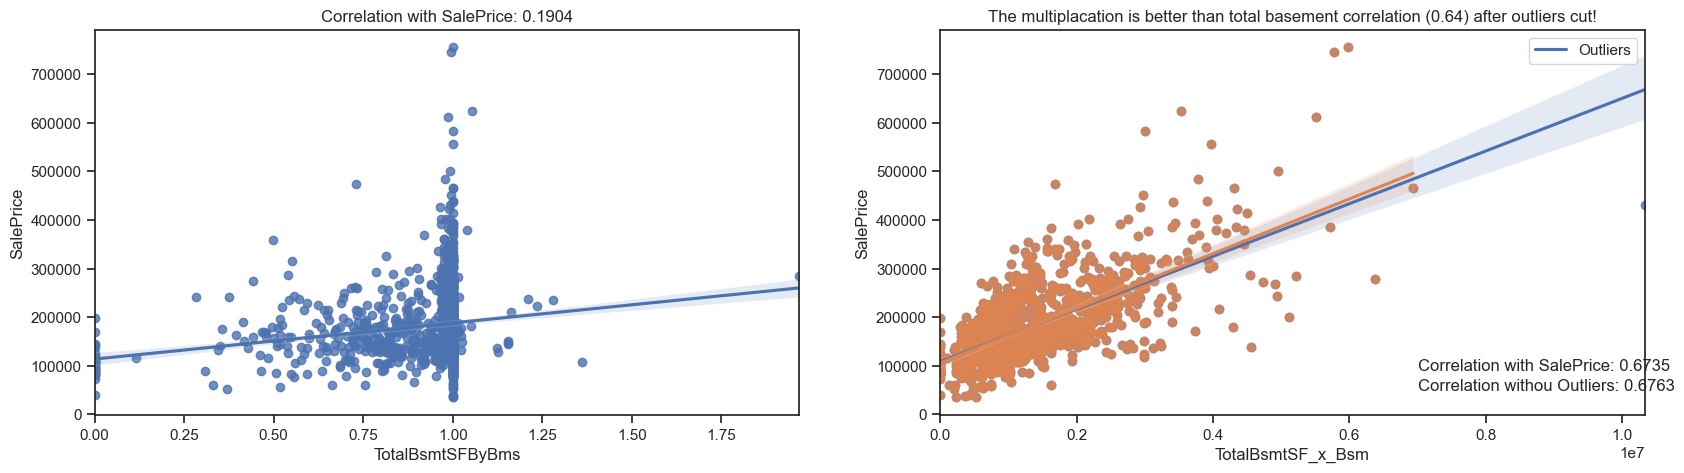

In [25]:
df = train[['SalePrice', 'TotalBsmtSF', '1stFlrSF']]
df['TotalBsmtSFByBms'] = train.TotalBsmtSF/train['1stFlrSF']
df['TotalBsmtSF_x_Bsm'] = train.TotalBsmtSF*train['1stFlrSF']
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='TotalBsmtSFByBms', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.TotalBsmtSFByBms.corr(df['SalePrice'])))
fig2 = fig.add_subplot(122); sns.regplot(x='TotalBsmtSF_x_Bsm', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=7e06, y=90000, s='Correlation with SalePrice: {:1.4f}'.format(df.TotalBsmtSF_x_Bsm.corr(df['SalePrice'])))

print('                                                             Outliers:',(df.TotalBsmtSF_x_Bsm>=0.9e07).sum())
df = df.loc[df.TotalBsmtSF_x_Bsm<0.9e07]
sns.regplot(x='TotalBsmtSF_x_Bsm', y='SalePrice', data=df); 
plt.title('The multiplacation is better than total basement correlation ({:1.2f}) after outliers cut!'.format(df.TotalBsmtSF.corr(df.SalePrice)))
plt.text(x=7e06, y=50000, s='Correlation withou Outliers: {:1.4f}'.format(df.TotalBsmtSF_x_Bsm.corr(df['SalePrice'])))
plt.show()
del df

### Bathrooms Features

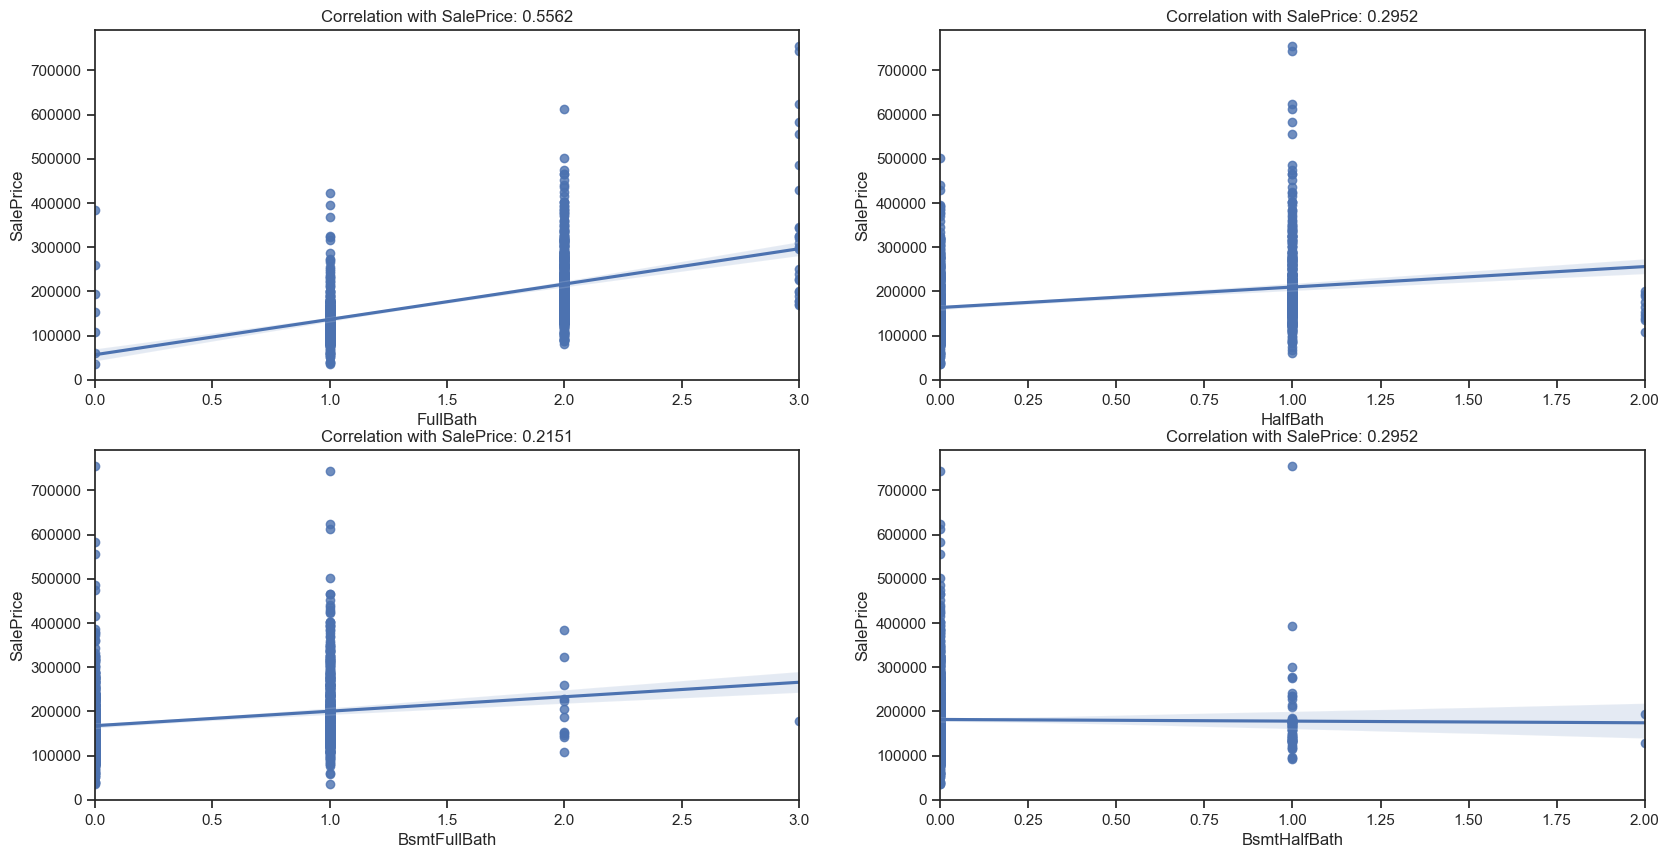

In [26]:
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(221); sns.regplot(x='FullBath', y='SalePrice', data=train)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train.FullBath.corr(train['SalePrice'])))

fig2 = fig.add_subplot(222); sns.regplot(x='HalfBath', y='SalePrice', data=train);
plt.title('Correlation with SalePrice: {:6.4f}'.format(train.HalfBath.corr(train['SalePrice'])))

fig3 = fig.add_subplot(223); sns.regplot(x='BsmtFullBath', y='SalePrice', data=train)
plt.title('Correlation with SalePrice: {:6.4f}'.format(train.BsmtFullBath.corr(train['SalePrice'])))

fig4 = fig.add_subplot(224); sns.regplot(x='BsmtHalfBath', y='SalePrice', data=train);
plt.title('Correlation with SalePrice: {:6.4f}'.format(train.HalfBath.corr(train['SalePrice'])))

plt.show()

 FullBath has the largest correlation with SalePrice between than. The others individually, these features are not very important.

In [27]:
df = train[['SalePrice', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']]
df['TotBathrooms'] = df.FullBath + (df.HalfBath*0.5) + df.BsmtFullBath + (df.BsmtHalfBath*0.5)

                                                                 Outliers: 2


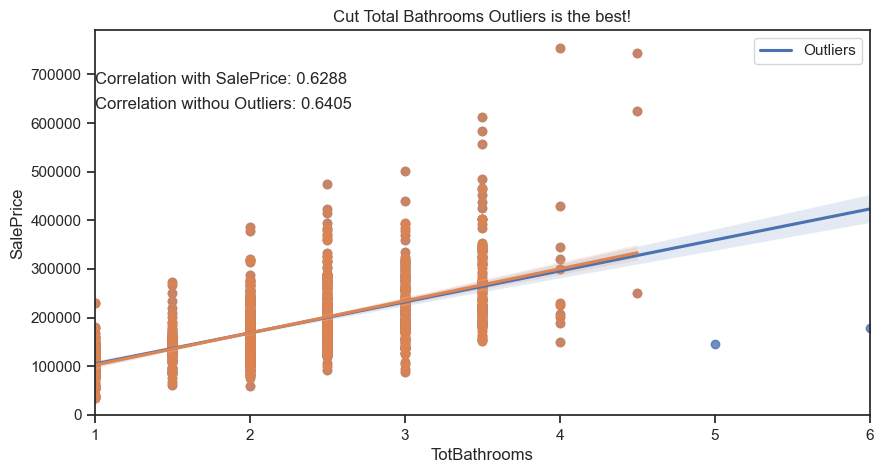

In [28]:
fig = plt.figure(figsize=(10,5))
sns.regplot(x='TotBathrooms', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=1, y=680000, s='Correlation with SalePrice: {:6.4f}'.format(df.TotBathrooms.corr(df['SalePrice'])))
print('                                                                 Outliers:',(df.TotBathrooms>=5).sum())
df = df.loc[df.TotBathrooms<5]
sns.regplot(x='TotBathrooms', y='SalePrice', data=df); plt.title('Cut Total Bathrooms Outliers is the best!')
plt.text(x=1, y=630000, s='Correlation withou Outliers: {:6.4f}'.format(df.TotBathrooms.corr(df['SalePrice'])))
plt.show()

So, with our best predictor, we can cut only two outliers, use it and substitute all others bath features with a existence indicator

In [29]:
train = train[(train.FullBath + (train.HalfBath*0.5) + train.BsmtFullBath + (train.BsmtHalfBath*0.5))<5]
print('Data observations after outliers deletion:', train.shape[0])

Data observations after outliers deletion: 1160


### Reviwe Porch Features

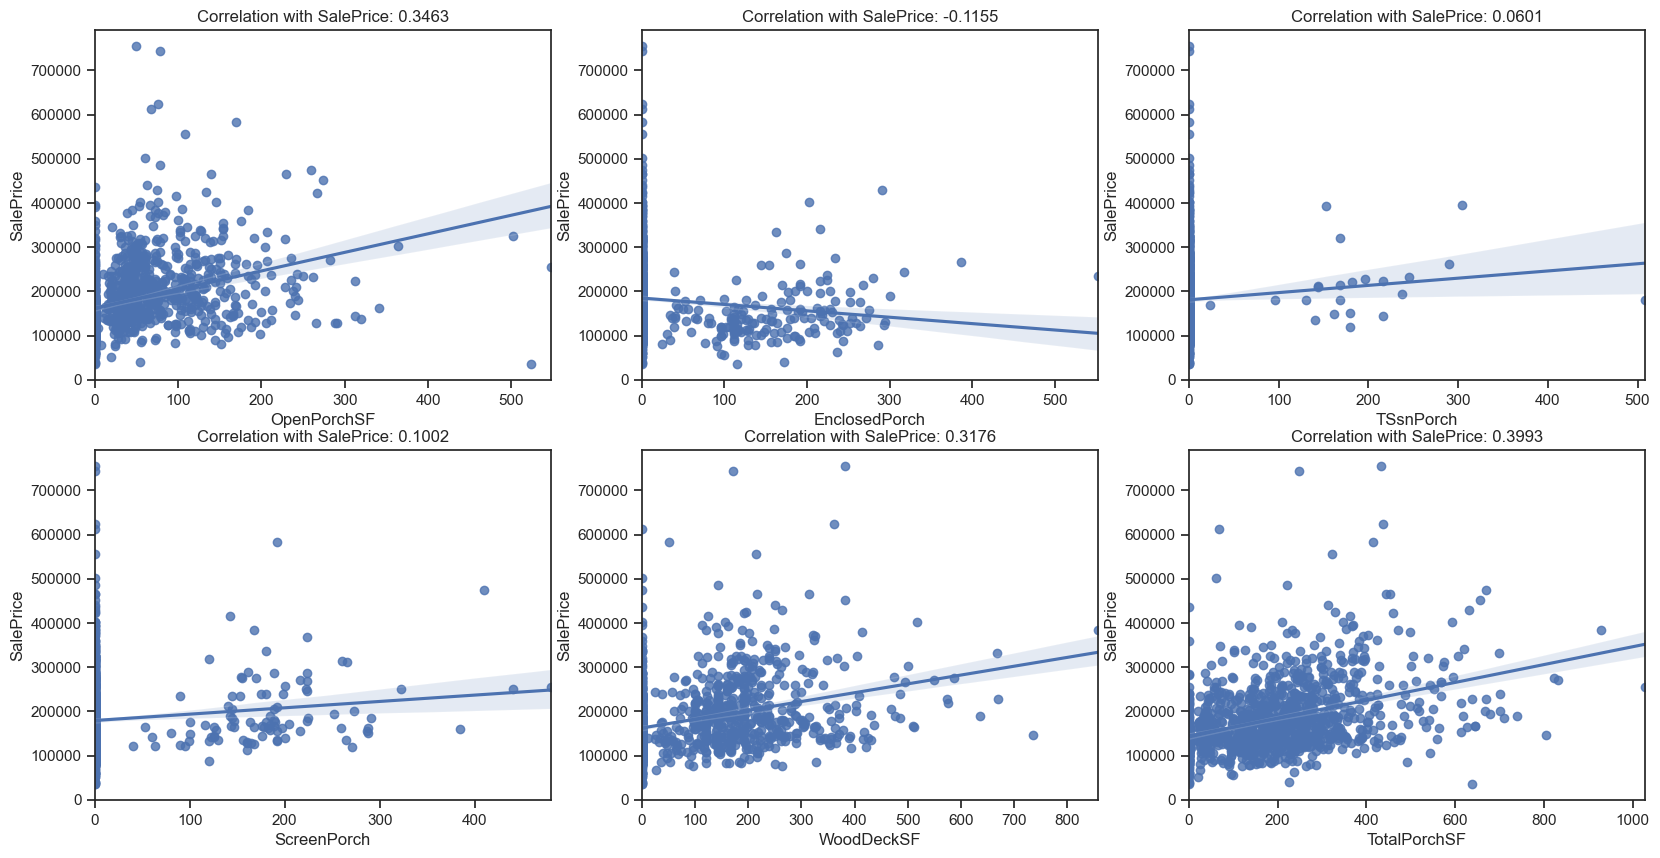

In [30]:
def PorchPlots():
    fig = plt.figure(figsize=(20,10))
    fig1 = fig.add_subplot(231); sns.regplot(x='OpenPorchSF', y='SalePrice', data=df)
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.OpenPorchSF.corr(df['SalePrice'])))

    fig2 = fig.add_subplot(232); sns.regplot(x='EnclosedPorch', y='SalePrice', data=df);
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.EnclosedPorch.corr(df['SalePrice'])))

    fig3 = fig.add_subplot(233); sns.regplot(x='TSsnPorch', y='SalePrice', data=df)
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.TSsnPorch.corr(df['SalePrice'])))

    fig4 = fig.add_subplot(234); sns.regplot(x='ScreenPorch', y='SalePrice', data=df);
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.ScreenPorch.corr(df['SalePrice'])))

    fig5 = fig.add_subplot(235); sns.regplot(x='WoodDeckSF', y='SalePrice', data=df);
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.WoodDeckSF.corr(df['SalePrice'])))

    fig6 = fig.add_subplot(236); sns.regplot(x='TotalPorchSF', y='SalePrice', data=df);
    plt.title('Correlation with SalePrice: {:6.4f}'.format(df.TotalPorchSF.corr(df['SalePrice'])))

    plt.show()
    
df = train[['SalePrice', 'OpenPorchSF', 'EnclosedPorch', 'TSsnPorch', 'ScreenPorch', 'WoodDeckSF']]
df['TotalPorchSF'] = df.OpenPorchSF + df.EnclosedPorch + df.TSsnPorch + df.ScreenPorch + df.WoodDeckSF
#df = df[df.TotalPorchSF<=600] # A possible outlier cut!
PorchPlots()

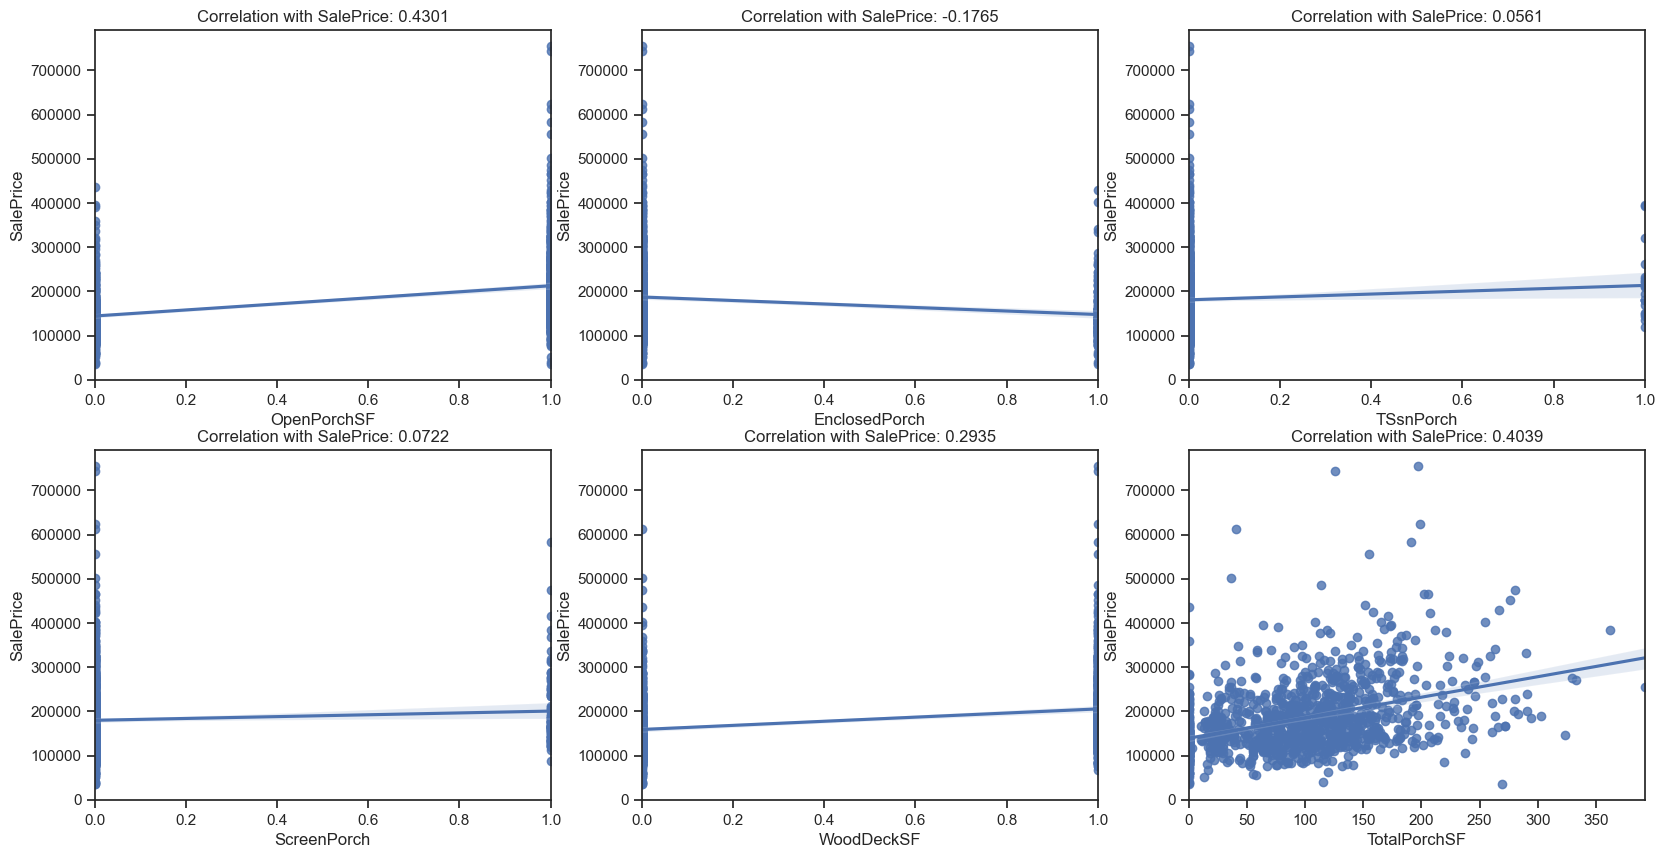

In [31]:
df.OpenPorchSF = df.OpenPorchSF > 0
df.EnclosedPorch =  df.EnclosedPorch > 0
df.TSsnPorch = df.TSsnPorch > 0
df.ScreenPorch = df.ScreenPorch > 0
df.WoodDeckSF = df.WoodDeckSF > 0
df.TotalPorchSF = np.sqrt(df.TotalPorchSF) * (np.log1p(np.sqrt(df.TotalPorchSF))**2)

PorchPlots()

As we have seen, porch features have low correlation with price, and by the graphics we see all most has low bas and high variance, being a high risk to end complex models and fall into ouverfit.

### Slope of property and Lot area

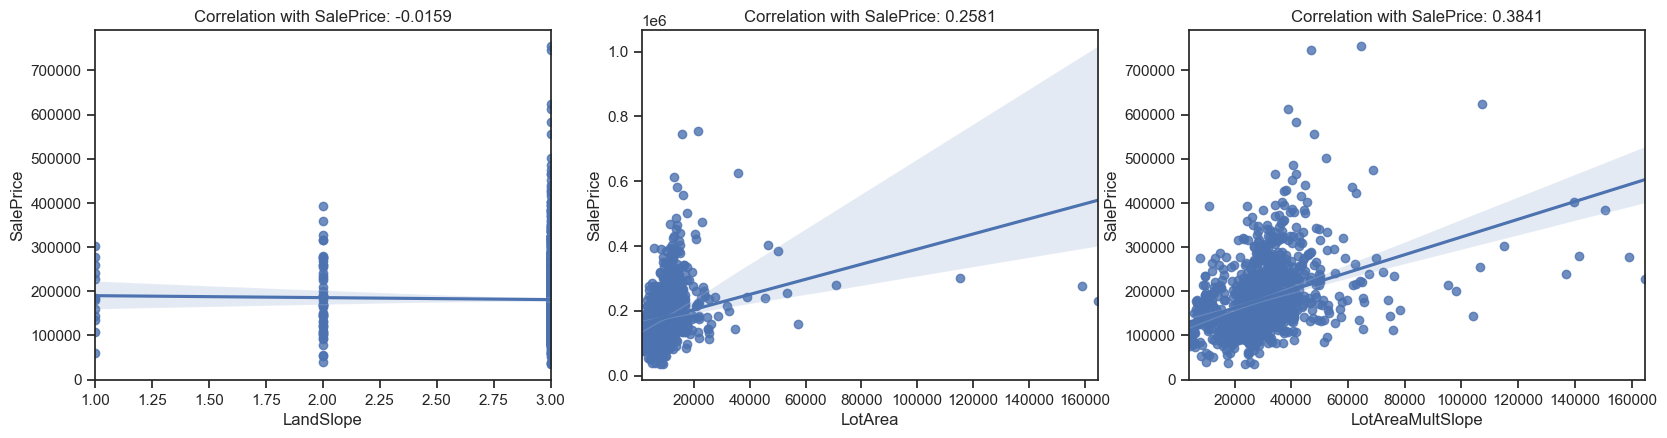

In [32]:
# LandSlope: Slope of property
LandSlope = {}
LandSlope['Gtl'] = 3 #'Gentle slope'
LandSlope['Mod'] = 2 #'Moderate Slope'
LandSlope['Sev'] = 1 #'Severe Slope'

df = train[['SalePrice', 'LandSlope', 'LotArea']]
df.LandSlope = df.LandSlope.map(LandSlope)
df['LotAreaMultSlope'] = (df.LotArea * df.LandSlope)

fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(231); sns.regplot(x='LandSlope', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LandSlope.corr(df['SalePrice'])))

fig2 = fig.add_subplot(232); sns.regplot(x='LotArea', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LotArea.corr(df['SalePrice'])))

fig3 = fig.add_subplot(233); sns.regplot(x='LotAreaMultSlope', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LotAreaMultSlope.corr(df['SalePrice'])))
plt.show()

It is interesting to note that the slope has a low correlation, but as an expected negative. On the other hand, the lot size does not present such a significant correlation, contrary to the interaction between these two characteristics, which is better and also allow us to identify some outliers. Let's take a look at the effect of removing the outliers.

      SalePrice  LandSlope  LotArea  LotAreaMultSlope
1038     277000          1   159000            159000
1123     228950          1   164660            164660


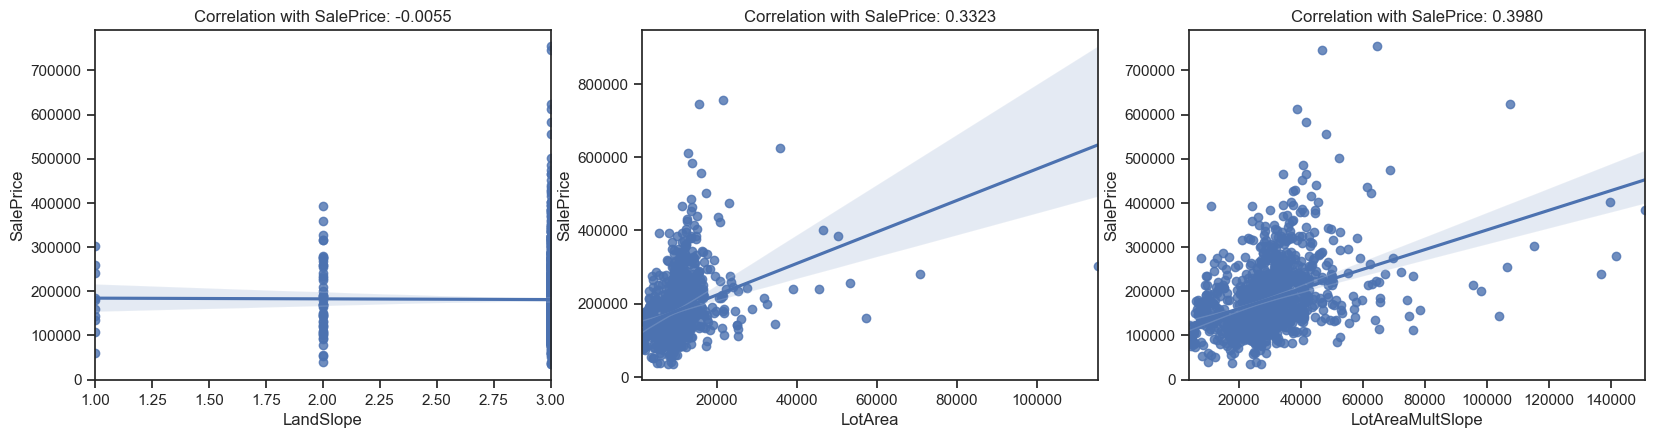

In [33]:
print(df[df.LotArea>155000])
df = df[df.LotArea<155000]
fig = plt.figure(figsize=(20,10))
fig1 = fig.add_subplot(234); sns.regplot(x='LandSlope', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LandSlope.corr(df['SalePrice'])))

fig2 = fig.add_subplot(235); sns.regplot(x='LotArea', y='SalePrice', data=df);
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LotArea.corr(df['SalePrice'])))

fig3 = fig.add_subplot(236); sns.regplot(x='LotAreaMultSlope', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.LotAreaMultSlope.corr(df['SalePrice'])))
plt.show()

### Neighborhood

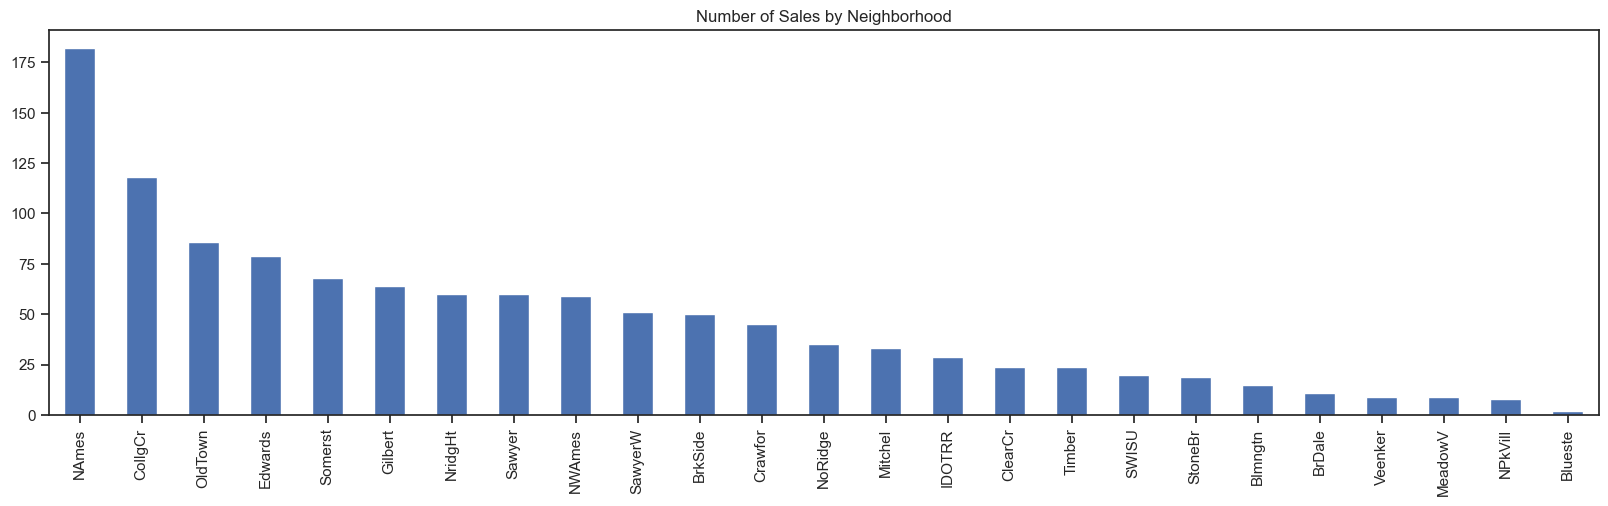

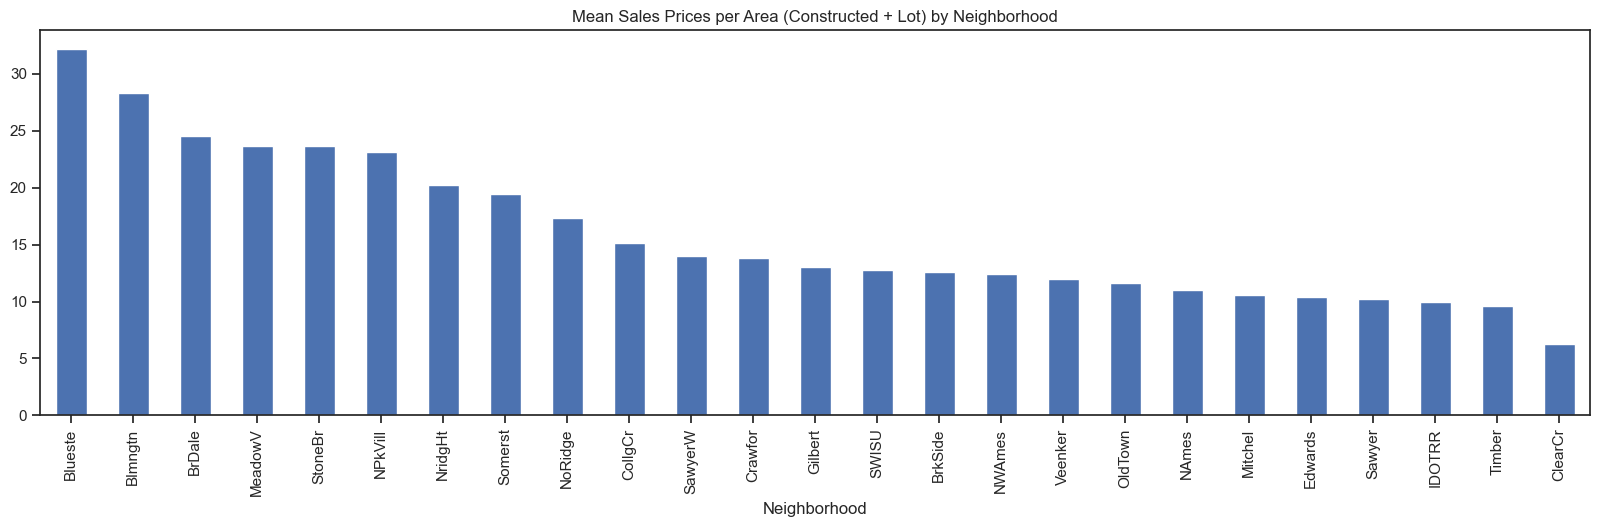

In [34]:
figa = plt.figure(figsize=(20, 5))
g = train.Neighborhood.value_counts().plot(kind='bar', title='Number of Sales by Neighborhood')

figb = plt.figure(figsize=(20, 5))
plt.tight_layout()
df = train[['SalePrice', 'YrSold', 'Neighborhood']]

df['TotalArea'] = (train.TotalBsmtSF.fillna(0) + train.WoodDeckSF.fillna(0) + train.GrLivArea.fillna(0) + 
                   train.LotArea.fillna(0) + train.MasVnrArea.fillna(0) + train.GarageArea.fillna(0) + 
                   train.OpenPorchSF.fillna(0) + train.TSsnPorch.fillna(0) + train.ScreenPorch.fillna(0) + 
                   train.EnclosedPorch.fillna(0) + train.PoolArea.fillna(0) )
 
df = df.groupby(by=['Neighborhood', 'YrSold'], as_index=False).sum()
Neig = df[['SalePrice', 'TotalArea', 'Neighborhood']].groupby(by='Neighborhood', as_index=False).sum()
Neig['NeigPrice'] = Neig.SalePrice / Neig.TotalArea
Neig.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)
g = Neig.groupby('Neighborhood').NeigPrice.sum().sort_values(ascending = False).\
    plot(kind='bar', title='Mean Sales Prices per Area (Constructed + Lot) by Neighborhood')
Neig = Neig.groupby(by='Neighborhood', as_index=True).NeigPrice.sum().sort_values(ascending = False)

As we can see prices are affected by the neighborhood, yes, if more similar more they attract. But we will delve a little and see how the year and month of the sale also has great influence on the price variation and confirm the seasonality.

                              Yearly Sales Prices per Area (Constructed + Lot) by Neighborhood:


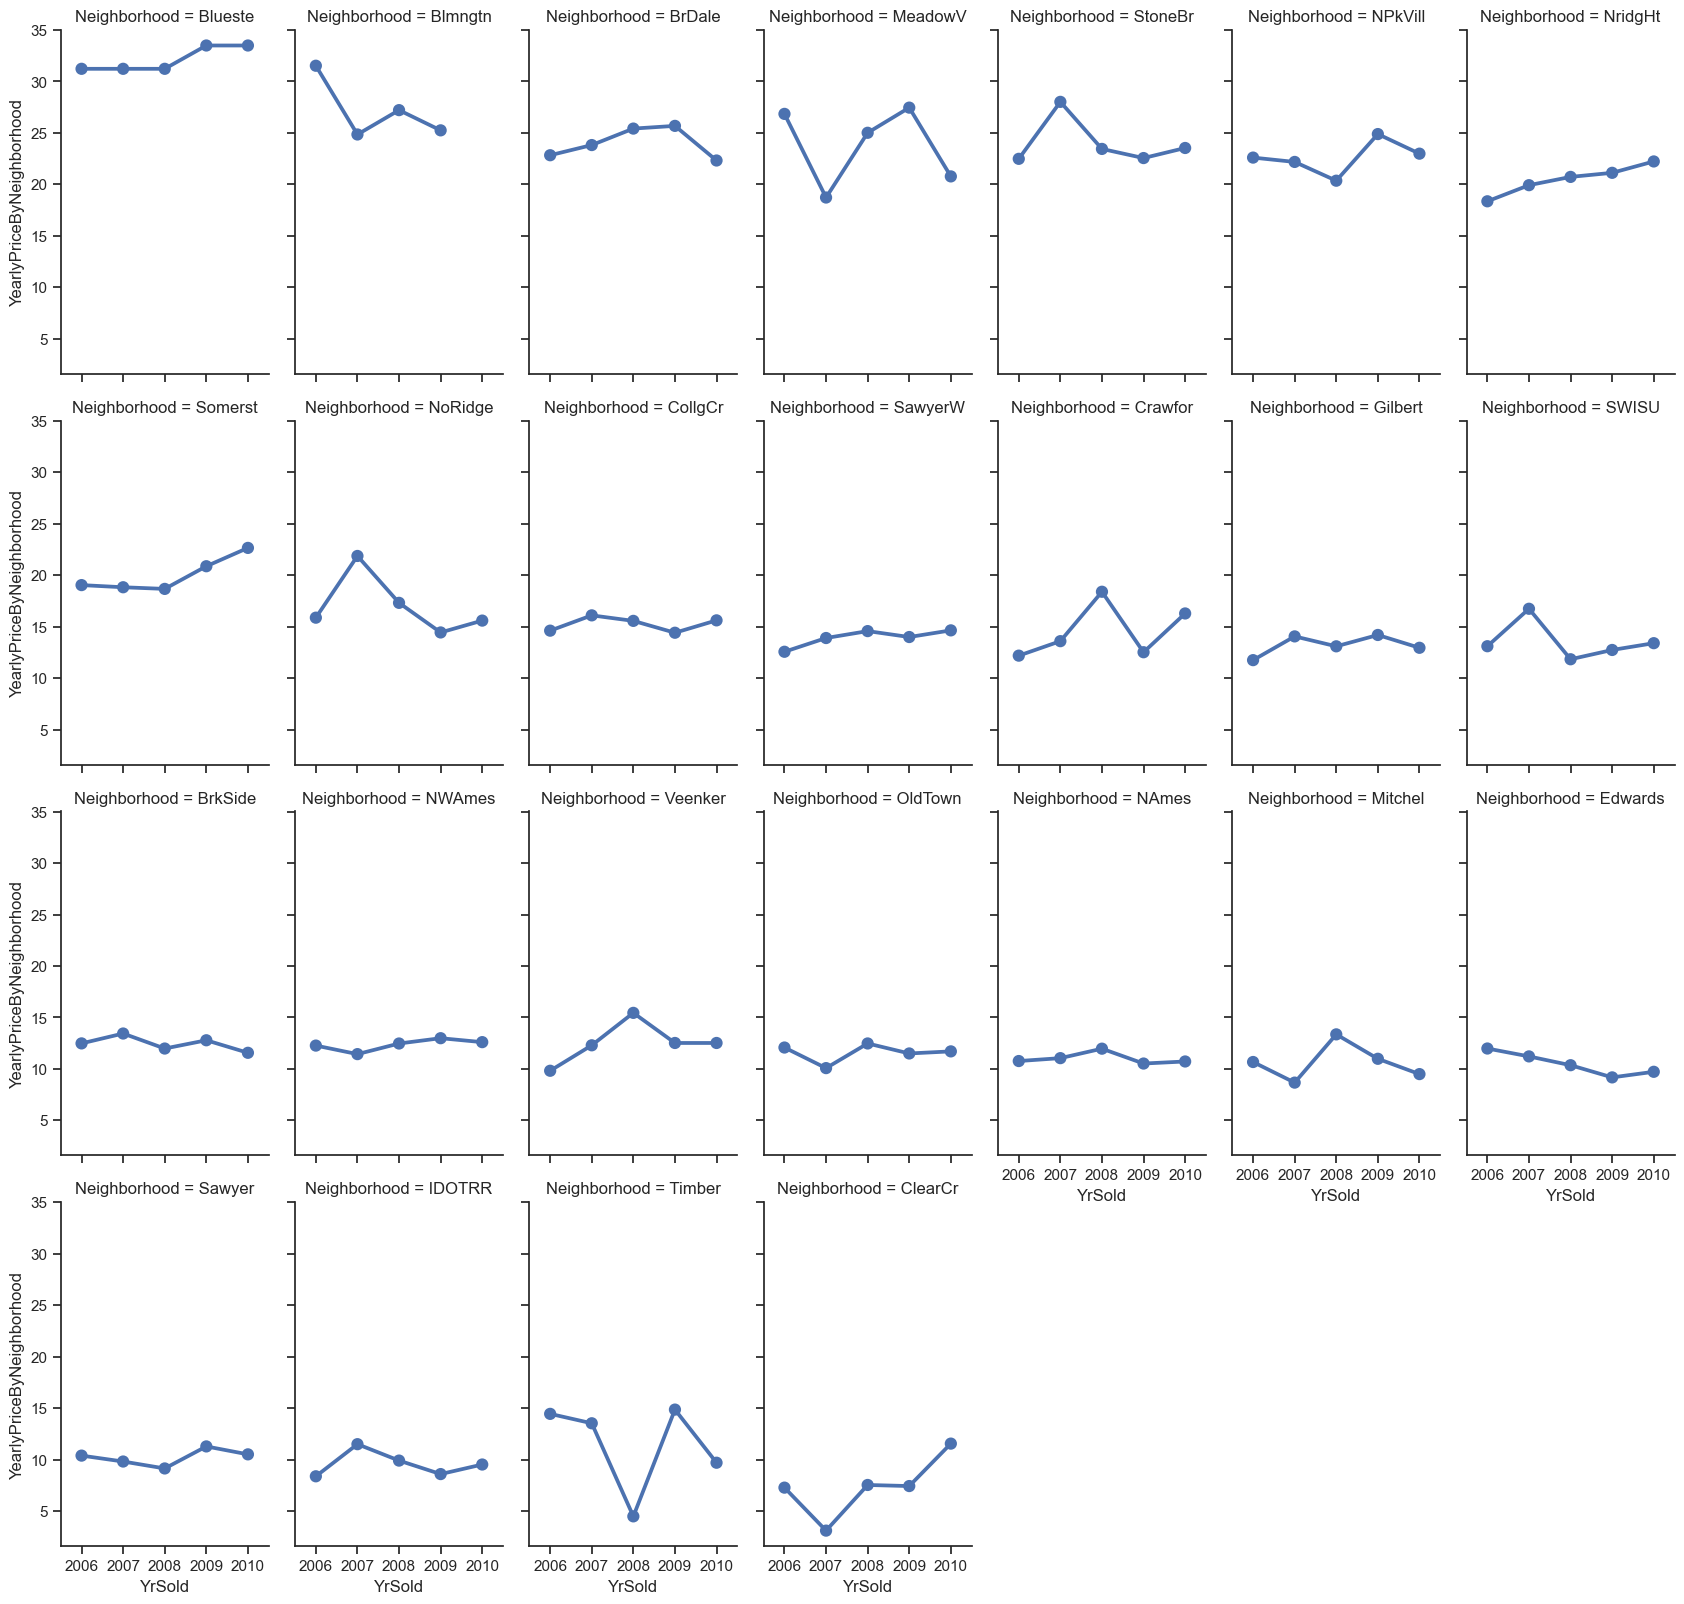

In [35]:
# Yearly Sales Price per Area (Constructed + Lot) by Neighborhood:
df['HistPriceByNeighborhood'] = df.SalePrice / df.TotalArea
df.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)

# Fill the gaps
df = df.append(pd.DataFrame([['NPkVill', 2006, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()]], 
                            columns=df.columns))

df = df.append(pd.DataFrame([['Veenker', 2009, df.HistPriceByNeighborhood[df.Neighborhood=='Veenker'].mean()]], 
                            columns=df.columns))

df = df.append(pd.DataFrame([['Veenker', 2010, df.HistPriceByNeighborhood[df.Neighborhood=='Veenker'].mean()]], 
                            columns=df.columns))

df = df.append(pd.DataFrame([['Blueste', 2006, df.HistPriceByNeighborhood[df.Neighborhood=='Blueste'].min()]], 
                            columns=df.columns))

df = df.append(pd.DataFrame([['Blueste', 2007, df.HistPriceByNeighborhood[df.Neighborhood=='Blueste'].min()]], 
                             columns=df.columns))
df = df.append(pd.DataFrame([['Blueste', 2010, df.HistPriceByNeighborhood[df.Neighborhood=='Blueste'].max()]], 
                            columns=df.columns))

# Reserve data to merge with all data set of train and test data
YearlyPrice = df
YearlyPrice.columns = ['Neighborhood', 'YrSold', 'YearlyPriceByNeighborhood']

print('                              Yearly Sales Prices per Area (Constructed + Lot) by Neighborhood:')
g = sns.catplot(y= 'YearlyPriceByNeighborhood', x = 'YrSold', col='Neighborhood', data=YearlyPrice, 
               kind="point", aspect=.6, col_wrap=7, height=4, col_order=Neig.index)

                                 Monthly Sales Prices per Area (Constructed + Lot) by Neighborhood:


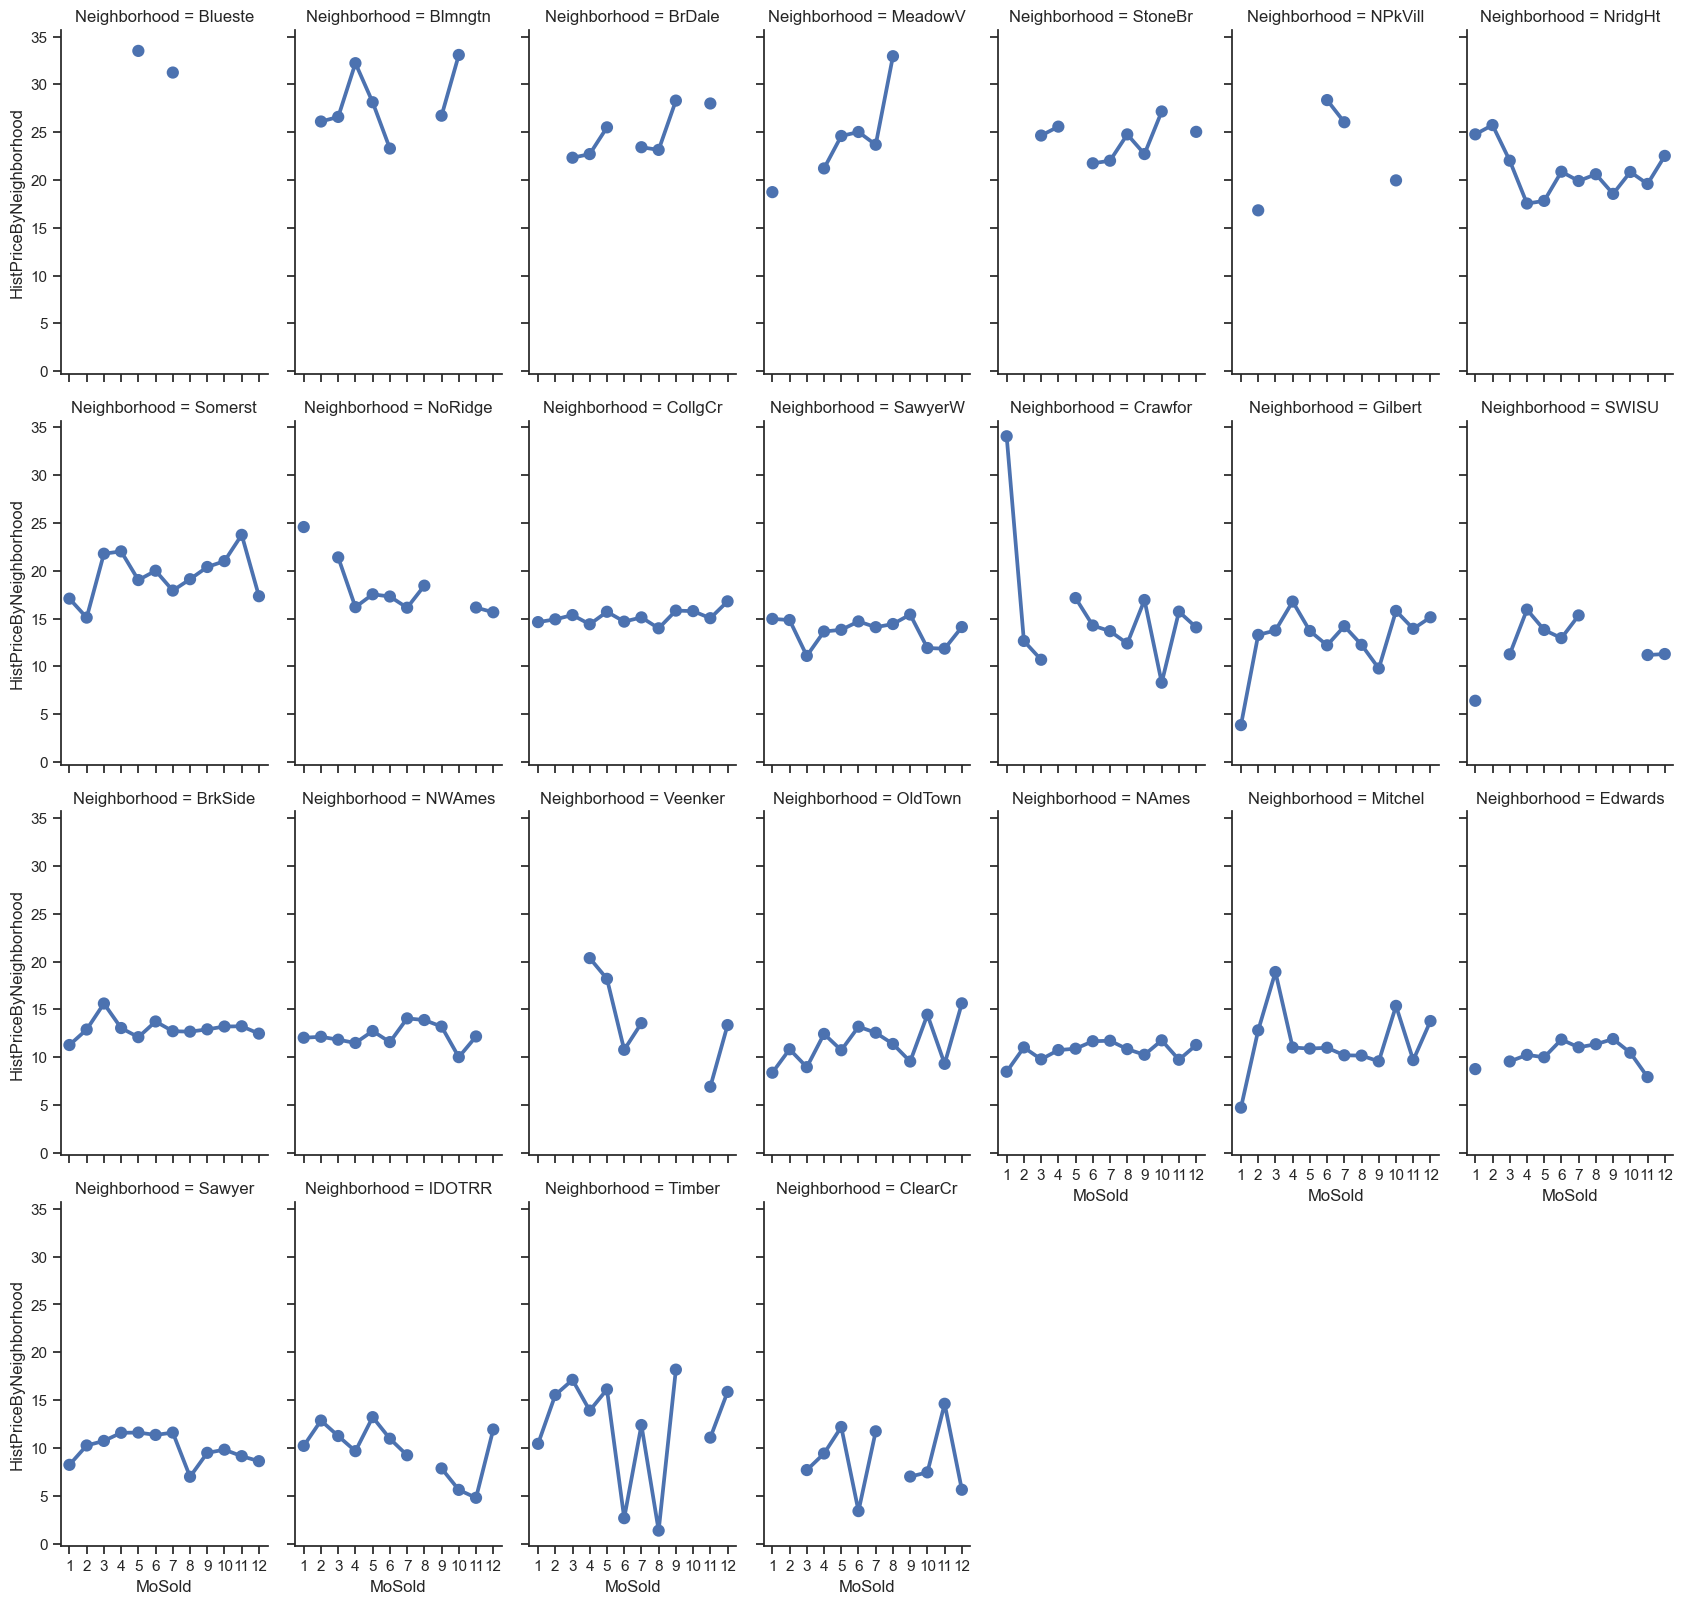

In [36]:
# Monthly Sales Prices per Area (Constructed + Lot) by Neighborhood:
df = train[['SalePrice', 'MoSold', 'Neighborhood']]

df['TotalArea'] = (train.TotalBsmtSF.fillna(0) + train.WoodDeckSF.fillna(0) + train.GrLivArea.fillna(0) + 
                   train.LotArea.fillna(0) + train.MasVnrArea.fillna(0) + train.GarageArea.fillna(0) + 
                   train.OpenPorchSF.fillna(0) + train.TSsnPorch.fillna(0) + train.ScreenPorch.fillna(0) + 
                   train.EnclosedPorch.fillna(0) + train.PoolArea.fillna(0) )

df = df.groupby(by=['Neighborhood', 'MoSold'], as_index=False).sum()
df['HistPriceByNeighborhood'] = df.SalePrice / df.TotalArea
df.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)

print('                                 Monthly Sales Prices per Area (Constructed + Lot) by Neighborhood:')
g = sns.catplot(y= 'HistPriceByNeighborhood', x = 'MoSold', col='Neighborhood', data=df, 
               kind="point", aspect=.6, col_wrap=7, height=4, col_order=Neig.index )

In [37]:
# Outliers from Crawfor Neighborhood
df = train[train.Neighborhood=='Crawfor'][['SalePrice', 'MoSold', 'Neighborhood']]

df['TotalArea'] = (train.TotalBsmtSF.fillna(0) + train.WoodDeckSF.fillna(0) + train.GrLivArea.fillna(0) + 
                   train.LotArea.fillna(0) + train.MasVnrArea.fillna(0) + train.GarageArea.fillna(0) + 
                   train.OpenPorchSF.fillna(0) + train.TSsnPorch.fillna(0) + train.ScreenPorch.fillna(0) + 
                   train.EnclosedPorch.fillna(0) + train.PoolArea.fillna(0) )

df['HistPriceByNeighborhood'] = df.SalePrice / df.TotalArea
df[df.HistPriceByNeighborhood>30]

,SalePrice,MoSold,Neighborhood,TotalArea,HistPriceByNeighborhood
120,275000,1,Crawfor,8074.000,34.060
791,392500,11,Crawfor,9875.000,39.747


In [38]:
train = train.loc[~(train.SalePrice==392500.0)]
train = train.loc[~((train.SalePrice==275000.0) & (train.Neighborhood=='Crawfor'))]
print('Data observations after outliers deletion:', train.shape[0])

Data observations after outliers deletion: 1158


                         Monthly Hist Sales Prices per Area (Construct + Lot) by Neighborhood:


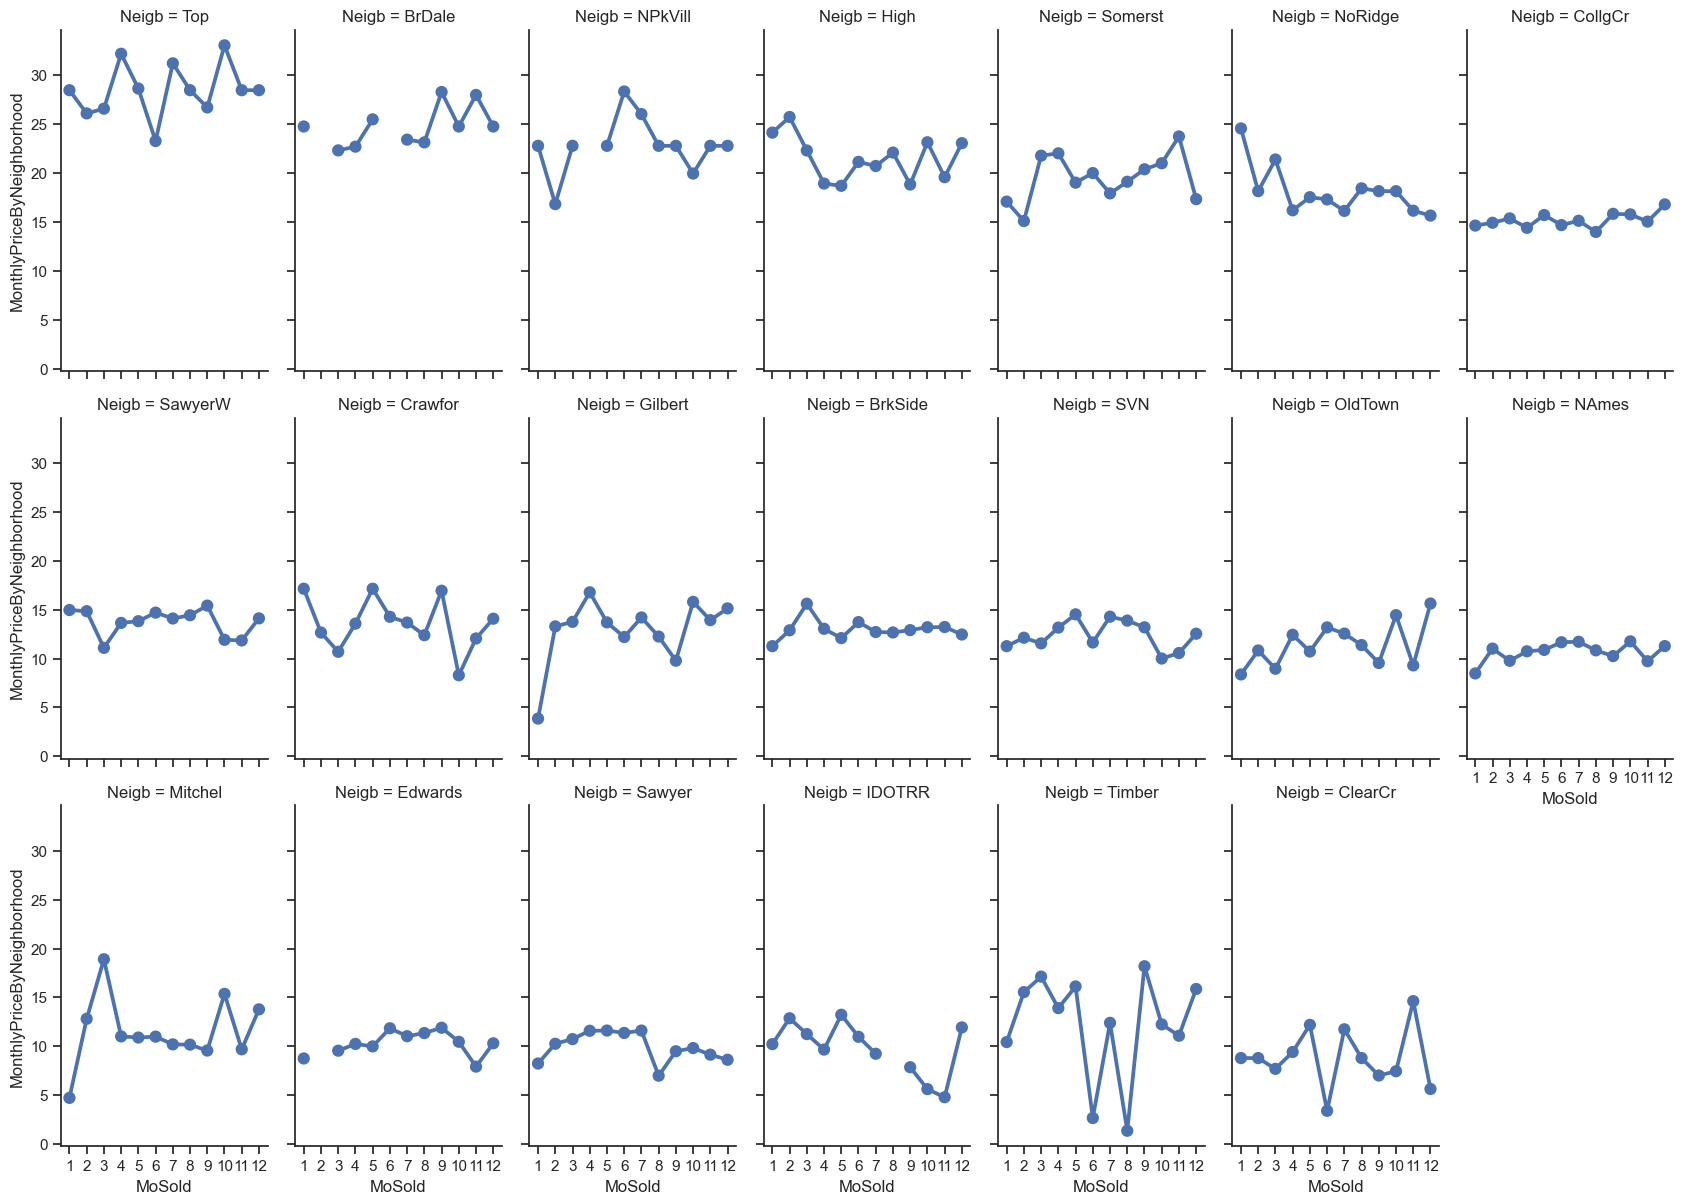

In [39]:
# Bin neighborhood for trade cases with low observations on monthly sales prices per Area (Constructed + Lot) by Neighborhood:
Neigb = {}
Neigb['Blueste'] = 'Top'     # 32.212721
Neigb['Blmngtn'] = 'Top'     # 28.364756
Neigb['BrDale']  = 'BrDale'  # 24.903923
Neigb['NPkVill'] = 'NPkVill' # 23.681105
Neigb['MeadowV'] = 'High'    # 22.034923
Neigb['StoneBr'] = 'High'    # 20.475090
Neigb['NridgHt'] =  'High'   # 20.209245
Neigb['Somerst'] = 'Somerst' # 19.551888
Neigb['NoRidge'] = 'NoRidge' # 17.038145
Neigb['CollgCr'] = 'CollgCr' # 15.134767
Neigb['SawyerW'] = 'SawyerW' # 13.992995
Neigb['Crawfor'] = 'Crawfor' # 13.773418
Neigb['Gilbert'] = 'Gilbert' # 13.260281
Neigb['BrkSide'] = 'BrkSide' # 12.785202
Neigb['SWISU']   = 'SVN'     # 12.635171
Neigb['Veenker'] = 'SVN'     # 12.343735
Neigb['NWAmes']  = 'SVN'     # 12.066590
Neigb['OldTown'] = 'OldTown' # 11.571331
Neigb['NAmes']   = 'NAmes'   # 11.091393
Neigb['Mitchel'] = 'Mitchel' # 10.936368
Neigb['Edwards'] = 'Edwards' # 10.614919
Neigb['Sawyer']  = 'Sawyer'  #10.334445
Neigb['IDOTRR']  = 'IDOTRR'  # 9.880838
Neigb['Timber']  = 'Timber'  # 8.723326
Neigb['ClearCr'] = 'ClearCr' # 6.113654

# Preper dataset for Sales Price per Area (Constructed + Lot) by Neighborhood:
df = train[['SalePrice', 'MoSold', 'Neighborhood']]

df['TotalArea'] = (train.TotalBsmtSF.fillna(0) + train.WoodDeckSF.fillna(0) + train.GrLivArea.fillna(0) + 
                   train.LotArea.fillna(0) + train.MasVnrArea.fillna(0) + train.GarageArea.fillna(0) + 
                   train.OpenPorchSF.fillna(0) + train.TSsnPorch.fillna(0) + train.ScreenPorch.fillna(0) + 
                   train.EnclosedPorch.fillna(0) + train.PoolArea.fillna(0) )
df['Price'] = df.SalePrice/df.TotalArea

# Cut Outliers from Crawfor Neighborhood
df = df[(((df.Neighborhood == 'Crawfor') & (df.Price<30.)) | (df.Neighborhood != 'Crawfor'))]
df.drop(['Price'], axis=1, inplace=True)

df.Neighborhood = train.Neighborhood.map(Neigb)

df = df.groupby(by=['Neighborhood', 'MoSold'], as_index=False).sum()
df['HistPriceByNeighborhood'] = df.SalePrice / df.TotalArea

# Get the index for order by value
Neig = df[['SalePrice', 'TotalArea', 'Neighborhood']].groupby(by='Neighborhood', as_index=False).sum()
Neig['NeigPrice'] = Neig.SalePrice / Neig.TotalArea
Neig.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)
Neig = Neig.groupby(by='Neighborhood', as_index=True).NeigPrice.sum().sort_values(ascending = False)

df.drop(['TotalArea', 'SalePrice'], axis=1, inplace=True)

# Fill the gaps
df = df.append(pd.DataFrame([['Top', 1, df.HistPriceByNeighborhood[df.Neighborhood=='Top'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['Top', 8, df.HistPriceByNeighborhood[df.Neighborhood=='Top'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['Top', 11, df.HistPriceByNeighborhood[df.Neighborhood=='Top'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['Top', 12, df.HistPriceByNeighborhood[df.Neighborhood=='Top'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['BrDale', 1, df.HistPriceByNeighborhood[df.Neighborhood=='BrDale'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['BrDale', 10, df.HistPriceByNeighborhood[df.Neighborhood=='BrDale'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['BrDale', 12, df.HistPriceByNeighborhood[df.Neighborhood=='BrDale'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NPkVill', 1, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NPkVill', 3, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NPkVill', 5, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NPkVill', 8, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NPkVill', 9, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NPkVill', 11, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NPkVill', 12, df.HistPriceByNeighborhood[df.Neighborhood=='NPkVill'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NoRidge', 2, df.HistPriceByNeighborhood[df.Neighborhood=='NoRidge'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NoRidge', 9, df.HistPriceByNeighborhood[df.Neighborhood=='NoRidge'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['NoRidge', 10, df.HistPriceByNeighborhood[df.Neighborhood=='NoRidge'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['Crawfor', 1, df.HistPriceByNeighborhood[df.Neighborhood=='Crawfor'].max()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['Crawfor', 4, df.HistPriceByNeighborhood[df.Neighborhood=='Crawfor'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['Timber', 10, df.HistPriceByNeighborhood[df.Neighborhood=='Timber'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['ClearCr', 1, df.HistPriceByNeighborhood[df.Neighborhood=='ClearCr'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['ClearCr', 2, df.HistPriceByNeighborhood[df.Neighborhood=='ClearCr'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['ClearCr', 8, df.HistPriceByNeighborhood[df.Neighborhood=='ClearCr'].mean()]], 
                            columns=df.columns))
df = df.append(pd.DataFrame([['Edwards', 12, df.HistPriceByNeighborhood[df.Neighborhood=='Edwards'].mean()]], 
                            columns=df.columns))


# Reserve data to merge with all data set of train and test data
MonthlyPrice = df
MonthlyPrice.columns = ['Neigb', 'MoSold', 'MonthlyPriceByNeighborhood']
print('                         Monthly Hist Sales Prices per Area (Construct + Lot) by Neighborhood:')
g = sns.catplot(y= 'MonthlyPriceByNeighborhood', x = 'MoSold', col='Neigb', data=MonthlyPrice, 
               kind="point", aspect=.6, col_wrap=7, height=4, col_order=Neig.index )

As we expected, the seasonality does have some effect, but of course we draw this conclusion based only on the above graphs is precipitated if not erroneous, given that even having restricted the views still exist houses with different characteristics in the same neighborhood.

However, this is sufficient to understand that the timing of the sale matters, so the model will probably have to take this into account, or this will be part of the residual errors.

In [40]:
train.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       213
LotArea             0
Street              0
Alley            1082
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [41]:
train['LotFrontage'].fillna(train['LotFrontage'].mode()[0], inplace=True)
train['Alley'].fillna(train['Alley'].mode()[0], inplace=True)
train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0], inplace=True)
train['Fence'].fillna(train['Fence'].mode()[0], inplace=True)
train['MiscFeature'].fillna(train['MiscFeature'].mode()[0], inplace=True)
train.drop(['PoolQC'], axis = 1, inplace= True)
train.isna().sum()


MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        7
MasVnrArea        7
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         30
BsmtCond         30
BsmtExposure     31
BsmtFinType1     30
BsmtFinSF1        0
BsmtFinType2     31
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


# Dropping Null Values

In [42]:
train = train.dropna(axis=1)
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
Foundation       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageCars       0
GarageArea       0
PavedDrive  

# Lets encode the dataset

### Using Label encoder for categorical features

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in train.columns:
    if train[col].dtypes == 'object':
        train[col] = le.fit_transform(train[col])

In [44]:
train.dtypes

MSSubClass         int64
MSZoning           int32
LotFrontage      float64
LotArea            int64
Street             int32
Alley              int32
LotShape           int32
LandContour        int32
Utilities          int32
LotConfig          int32
LandSlope          int32
Neighborhood       int32
Condition1         int32
Condition2         int32
BldgType           int32
HouseStyle         int32
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle          int32
RoofMatl           int32
Exterior1st        int32
Exterior2nd        int32
ExterQual          int32
ExterCond          int32
Foundation         int32
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating            int32
HeatingQC          int32
CentralAir         int32
Electrical         int32
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64


# Checking the Skewness

In [45]:
train.skew()

MSSubClass        1.429
MSZoning         -1.777
LotFrontage       2.109
LotArea          11.188
Street          -19.596
Alley             5.495
LotShape         -0.603
LandContour      -3.225
Utilities         0.000
LotConfig        -1.111
LandSlope         4.929
Neighborhood      0.035
Condition1        3.022
Condition2       12.021
BldgType          2.346
HouseStyle        0.282
OverallQual       0.160
OverallCond       0.578
YearBuilt        -0.577
YearRemodAdd     -0.490
RoofStyle         1.526
RoofMatl          7.571
Exterior1st      -0.620
Exterior2nd      -0.600
ExterQual        -1.814
ExterCond        -2.514
Foundation       -0.001
BsmtFinSF1        0.778
BsmtFinSF2        4.345
BsmtUnfSF         0.901
TotalBsmtSF       0.518
Heating          10.059
HeatingQC         0.445
CentralAir       -3.457
Electrical       -3.109
1stFlrSF          0.946
2ndFlrSF          0.818
LowQualFinSF      8.919
GrLivArea         1.004
BsmtFullBath      0.537
BsmtHalfBath      4.332
FullBath        

### Using numpy.log1p() to remove the skewness nearest to 0.55

This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.

log1p is reverse of exp(x) – 1

In [46]:
features = train.drop('SalePrice', axis=1)
label = train['SalePrice']

In [47]:
for col in features:
    if train.skew().loc[col]>0.55:
        train[col] = np.log1p(train[col])

In [48]:
train.skew()

MSSubClass        0.239
MSZoning         -1.777
LotFrontage      -0.643
LotArea          -0.238
Street          -19.596
Alley             5.495
LotShape         -0.603
LandContour      -3.225
Utilities         0.000
LotConfig        -1.111
LandSlope         4.401
Neighborhood      0.035
Condition1       -1.017
Condition2       -2.352
BldgType          2.118
HouseStyle        0.282
OverallQual       0.160
OverallCond      -0.427
YearBuilt        -0.577
YearRemodAdd     -0.490
RoofStyle         1.183
RoofMatl          7.144
Exterior1st      -0.620
Exterior2nd      -0.600
ExterQual        -1.814
ExterCond        -2.514
Foundation       -0.001
BsmtFinSF1       -0.604
BsmtFinSF2        2.487
BsmtUnfSF        -2.135
TotalBsmtSF       0.518
Heating           7.758
HeatingQC         0.445
CentralAir       -3.457
Electrical       -3.109
1stFlrSF          0.020
2ndFlrSF          0.288
LowQualFinSF      7.230
GrLivArea        -0.086
BsmtFullBath      0.537
BsmtHalfBath      4.109
FullBath        

In [49]:
train.shape

(1158, 67)

# Using Boxplot to check the outliers

MSSubClass         AxesSubplot(0.125,0.814746;0.0945122x0.0652542)
MSZoning         AxesSubplot(0.238415,0.814746;0.0945122x0.0652...
LotFrontage      AxesSubplot(0.351829,0.814746;0.0945122x0.0652...
LotArea          AxesSubplot(0.465244,0.814746;0.0945122x0.0652...
Street           AxesSubplot(0.578659,0.814746;0.0945122x0.0652...
Alley            AxesSubplot(0.692073,0.814746;0.0945122x0.0652...
LotShape         AxesSubplot(0.805488,0.814746;0.0945122x0.0652...
LandContour        AxesSubplot(0.125,0.736441;0.0945122x0.0652542)
Utilities        AxesSubplot(0.238415,0.736441;0.0945122x0.0652...
LotConfig        AxesSubplot(0.351829,0.736441;0.0945122x0.0652...
LandSlope        AxesSubplot(0.465244,0.736441;0.0945122x0.0652...
Neighborhood     AxesSubplot(0.578659,0.736441;0.0945122x0.0652...
Condition1       AxesSubplot(0.692073,0.736441;0.0945122x0.0652...
Condition2       AxesSubplot(0.805488,0.736441;0.0945122x0.0652...
BldgType           AxesSubplot(0.125,0.658136;0.0945122x0.0652

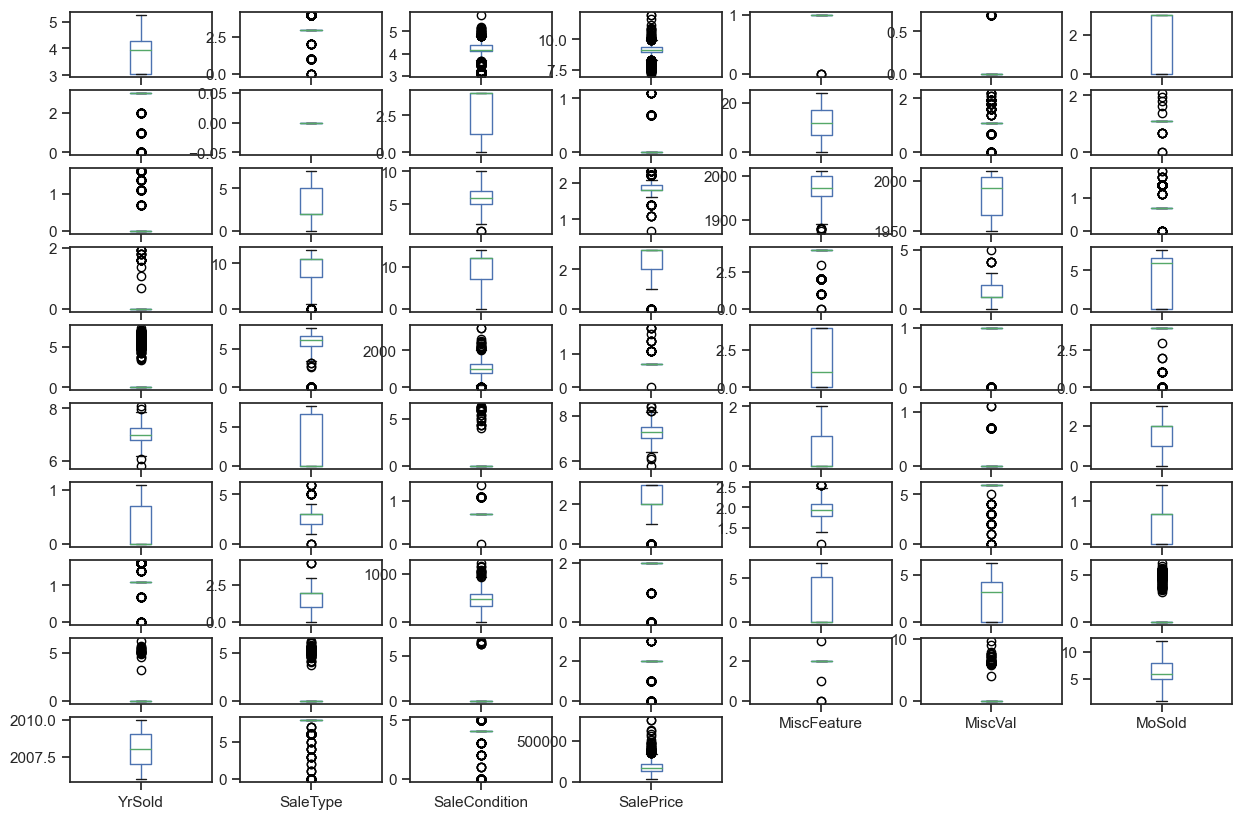

In [50]:
train.plot(kind='box',subplots=True, layout=(10,7),figsize=(15,10))

# Diving Features and Label

In [51]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X1 = train.drop('SalePrice', axis=1)
y1 = train['SalePrice']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.3, random_state=0)

### Linear Regression

In [52]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.8668
Test Score : 0.8322


 ### Ridge

In [53]:
model = Ridge()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.8668
Test Score : 0.8324


### Gradient Boost

In [54]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9749
Test Score : 0.8927


### K-Nearest Neighbors

In [55]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.8384
Test Score : 0.7889


### Random Forest

In [56]:
model = RandomForestRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 0.9823
Test Score : 0.8728


### Decision Tree

In [57]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)
print('Train Score : {:.4f}'.format(model.score(X_train, y_train)))
print('Test Score : {:.4f}'.format(model.score(X_test, y_test)))

Train Score : 1.0000
Test Score : 0.7878


# Hyperparameter Tuning

In [138]:
from sklearn.model_selection import GridSearchCV

models = []
scores = []

### Ridge

In [139]:
param_grid = {'alpha' : [0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
model = Ridge()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
ridge_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(ridge_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Ridge')
scores.append(ridge_score)

Test Score : 0.8394
Best Parameters : {'alpha': 100}
Best CV Score : 0.8347


### Gradient Boost

In [140]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)

Test Score : 0.8993
Best Parameters : {'max_depth': 2}
Best CV Score : 0.8837


### K-Nearest Neighbors

In [141]:
param_grid = {'n_neighbors' : range(1, 20)}
model = KNeighborsRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
knr_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(knr_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('K-Nearest Neighbors')
scores.append(knr_score)

Test Score : 0.7773
Best Parameters : {'n_neighbors': 7}
Best CV Score : 0.7653


### Random Forest

In [142]:
param_grid = {'max_depth' : [5, 10, 15, 20, 25, 30]}
model = RandomForestRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
rf_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(rf_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Random Forest')
scores.append(rf_score)

Test Score : 0.8724
Best Parameters : {'max_depth': 15}
Best CV Score : 0.8691


### Decision Tree

In [143]:
am_grid = {'max_depth' : range(2, 20), "min_samples_leaf" : range(2, 10)}
model = DecisionTreeRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
dt_score = grid_search.score(X_test, y_test)

print('Test Score : {:.4f}'.format(dt_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Decision Tree')
scores.append(dt_score)

Test Score : 0.7486
Best Parameters : {'max_depth': 25}
Best CV Score : 0.7151


### Result

In [144]:
df_result = pd.DataFrame({'Model' : models, 'Score' : scores})
df_result

,Model,Score
0,Ridge,0.839
1,Gradient Boost,0.899
2,K-Nearest Neighbors,0.777
3,Random Forest,0.872
4,Decision Tree,0.749


### Lets Predict

In [180]:
test = pd.read_csv('housing_test.csv')
test.shape

(292, 80)

In [181]:
test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [182]:
test['LotFrontage'].fillna(test['LotFrontage'].mode()[0], inplace=True)
test['Alley'].fillna(test['Alley'].mode()[0], inplace=True)
test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0], inplace=True)
test['Fence'].fillna(test['Fence'].mode()[0], inplace=True)
test['MiscFeature'].fillna(test['MiscFeature'].mode()[0], inplace=True)
test['Electrical'].fillna(test['Electrical'].mode()[0], inplace=True)
test.drop(['PoolQC'], axis = 1,inplace=True)
test.drop(['Id'], axis = 1,inplace=True)
test.isna().sum()

MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        1
MasVnrArea        1
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          7
BsmtCond          7
BsmtExposure      7
BsmtFinType1      7
BsmtFinSF1        0
BsmtFinType2      7
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [184]:
test = test.dropna(axis=1)
test.isna().sum()
test.shape

(292, 66)

## Encoding on test data

In [187]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in test.columns:
    if test[col].dtypes == 'object':
        test[col] = le.fit_transform(test[col])

In [190]:
param_grid = {'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9,10,11,12]}
model = GradientBoostingRegressor()

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
gb_score = grid_search.score(X_test, y_test)
  

print('Test Score : {:.4f}'.format(gb_score))
print('Best Parameters :', grid_search.best_params_)
print('Best CV Score : {:.4f}'.format(grid_search.best_score_))

models.append('Gradient Boost')
scores.append(gb_score)


Test Score : 0.8998
Best Parameters : {'max_depth': 2}
Best CV Score : 0.8843


In [191]:
import numpy as np
predicted=np.array(grid_search.predict(test))
data_com = pd.DataFrame({"Predicted":predicted})
data_com.head(50)

,Predicted
0,617947.508
1,603051.658
2,561870.705
3,711690.500
4,673297.730
5,522447.615
6,608634.279
7,608634.279
8,604196.842
9,608634.279


# Converting Test Dataset to excel

In [85]:
# Determining the name of the file
file_name = 'Predict_housing_Data.xlsx'
  
# saving the excel
data_com.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.
